# 1. Veri Kümesi Tanıtımı ve Genel Bakış

Bu projede kullanılan veri seti, [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk) yarışmasına ait bir finansal kredi başvuru veri setidir.  

Amaç, bireylerin kredi geri ödeme davranışını tahmin edebilecek modeller geliştirmektir.

Veri kümesi hakkında genel bilgiler aşağıda özetlenmiştir:
- **Veri kümesi adı:** application_train.csv  
- **Kayıt sayısı:** 307511  
- **Özellik sayısı:** 122  
- **Hedef sınıf sayısı:** 2 (`0`: zamanında ödeyen, `1`: geciken)  
- **Sınıf dağılımı:** `TARGET` sütununa göre dağılım  
- **Eksik değer sayısı:** Her sütun için  
- **Sayısal olmayan sütunlar:** `object` türündeki tüm sütunlar


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Veri yolu
csv_path = '/content/drive/MyDrive/ML_Project/dataset/application_train.csv'
df = pd.read_csv(csv_path)

# Genel bilgiler
print("🔢 Veri Şekli:", df.shape)
print("\n🎯 TARGET Dağılımı:")
print(df['TARGET'].value_counts(normalize=True))

print("\n🔤 Sayısal olmayan sütunlar:")
print(df.select_dtypes(include='object').columns.tolist())

print("\n⚠️ En çok eksik değere sahip 10 sütun:")
print(df.isna().sum().sort_values(ascending=False).head(10))


🔢 Veri Şekli: (307511, 122)

🎯 TARGET Dağılımı:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

🔤 Sayısal olmayan sütunlar:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

⚠️ En çok eksik değere sahip 10 sütun:
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
dtype: int64


## c) Kategorik Özellik Dağılımı

Bu bölümde, veri setinde yer alan **kategorik değişkenlerin** (tipi `object` olan sütunlar) sınıf dağılımları analiz edilmiştir. Kategorik değişkenler genellikle sınıflayıcı modellerde önemli ayrımlar sağladığı için, veri ön işleme sürecinde bu sütunların doğru anlaşılması kritik öneme sahiptir.

Analiz kapsamında yapılanlar:
- Kategorik değişkenlerin isimleri listelenmiştir.
- Her bir değişken için, kaç farklı kategoriye sahip olduğu ve bunların dağılımı tablo olarak gösterilmiştir.
- Ayrıca, her kategorik değişkenin frekans grafiği (`countplot`) görselleştirme amacıyla çizdirilmiştir.

Bu analiz sayesinde:
- **Sınıf dengesizlikleri** tespit edilebilir.
- İleri işlem adımları için hangi değişkenlere **Label Encoding** veya **One-Hot Encoding** gibi tekniklerin uygulanacağına karar verilebilir.


### NAME_CONTRACT_TYPE Değişkeni

Bu değişken başvuru sahibinin kredi başvurusunda bulunduğu sözleşme türünü ifade eder. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 NAME_CONTRACT_TYPE sütunu dağılımı:
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


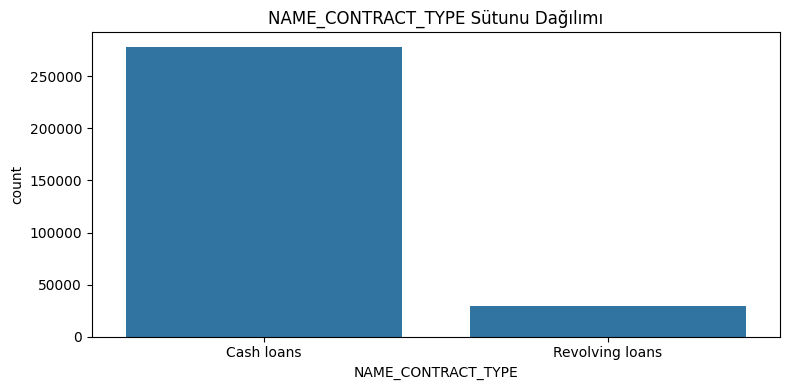

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

col = 'NAME_CONTRACT_TYPE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.tight_layout()
plt.show()


### CODE_GENDER Değişkeni

Başvuru sahibinin cinsiyetini belirtir. Genellikle "M" (erkek) ve "F" (kadın) değerlerini alır. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 CODE_GENDER sütunu dağılımı:
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


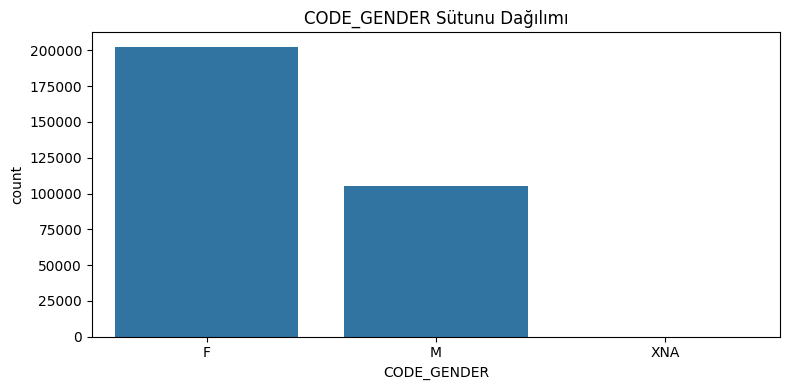

In [ ]:
col = 'CODE_GENDER'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.tight_layout()
plt.show()


### FLAG_OWN_CAR Değişkeni

Başvuru sahibinin üzerine kayıtlı bir arabası olup olmadığını gösterir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 FLAG_OWN_CAR sütunu dağılımı:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64


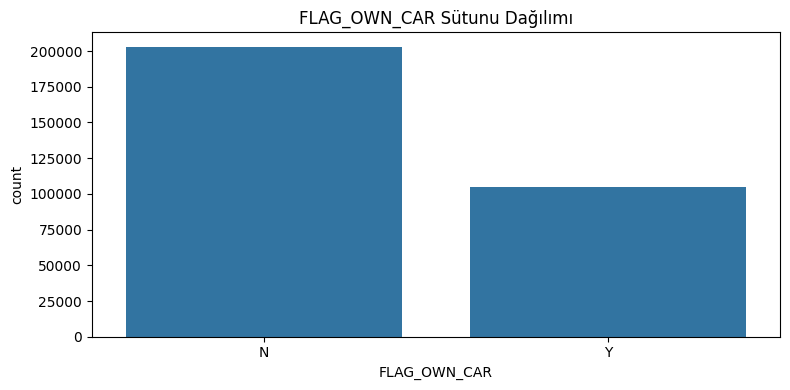

In [ ]:
col = 'FLAG_OWN_CAR'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.tight_layout()
plt.show()


### FLAG_OWN_REALTY Değişkeni

Başvuru sahibinin üzerine kayıtlı bir gayrimenkulü olup olmadığını belirtir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 FLAG_OWN_REALTY sütunu dağılımı:
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


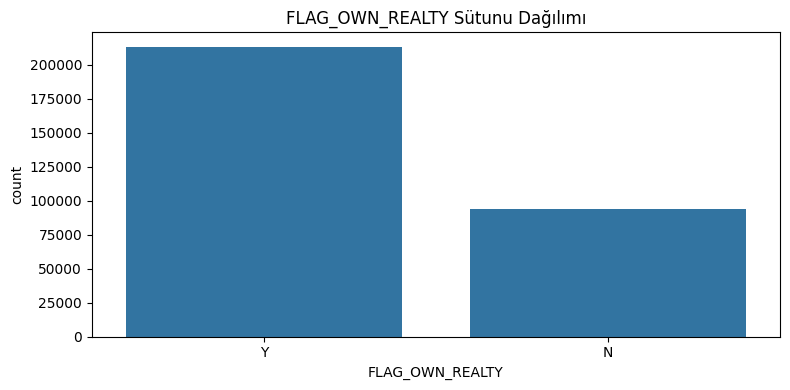

In [ ]:
col = 'FLAG_OWN_REALTY'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.tight_layout()
plt.show()


### NAME_TYPE_SUITE Değişkeni

Başvuru sırasında müşterinin yanında bulunan kişi(ler)in türünü gösterir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 NAME_TYPE_SUITE sütunu dağılımı:
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64


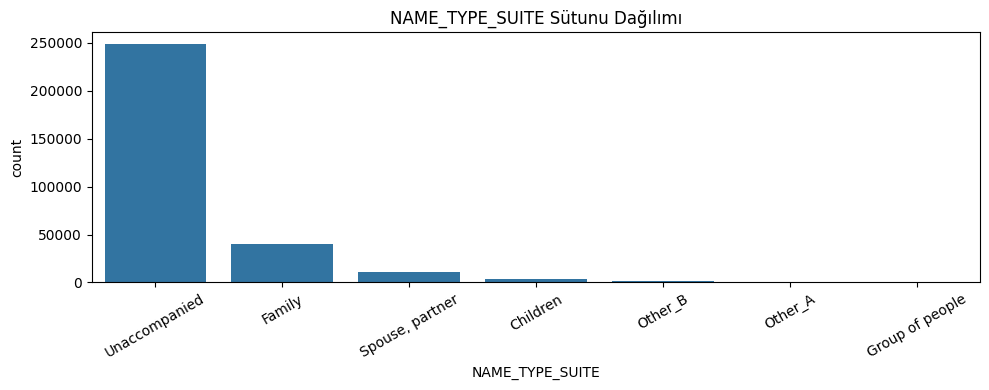

In [ ]:
col = 'NAME_TYPE_SUITE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### NAME_INCOME_TYPE Değişkeni

Başvuru sahibinin gelir kaynağının türünü (örneğin işçi, emekli) belirtir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.


📊 NAME_INCOME_TYPE sütunu dağılımı:
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64


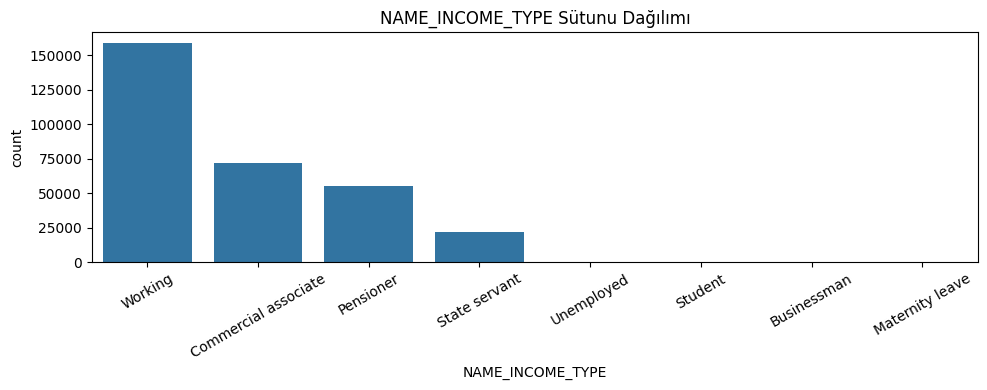

In [ ]:
col = 'NAME_INCOME_TYPE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### NAME_EDUCATION_TYPE Değişkeni

Başvuru sahibinin eğitim seviyesini belirtir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.


📊 NAME_EDUCATION_TYPE sütunu dağılımı:
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


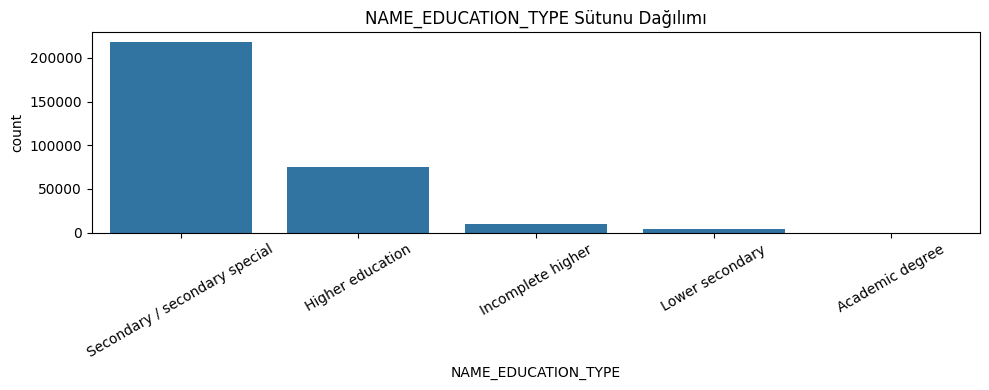

In [ ]:
col = 'NAME_EDUCATION_TYPE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### NAME_FAMILY_STATUS Değişkeni

Başvuru sahibinin medeni durumunu tanımlar. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 NAME_FAMILY_STATUS sütunu dağılımı:
NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64


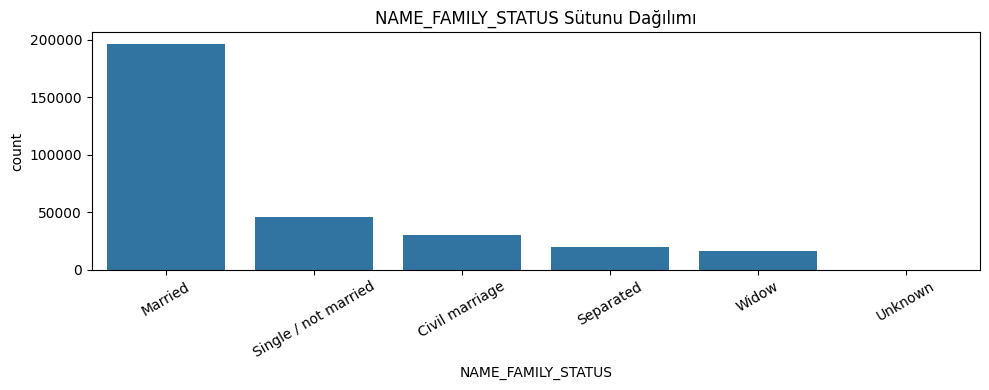

In [ ]:
col = 'NAME_FAMILY_STATUS'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### NAME_HOUSING_TYPE Değişkeni

Başvuru sahibinin konut türünü (örneğin kiralık, sahipli) gösterir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.


📊 NAME_HOUSING_TYPE sütunu dağılımı:
NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64


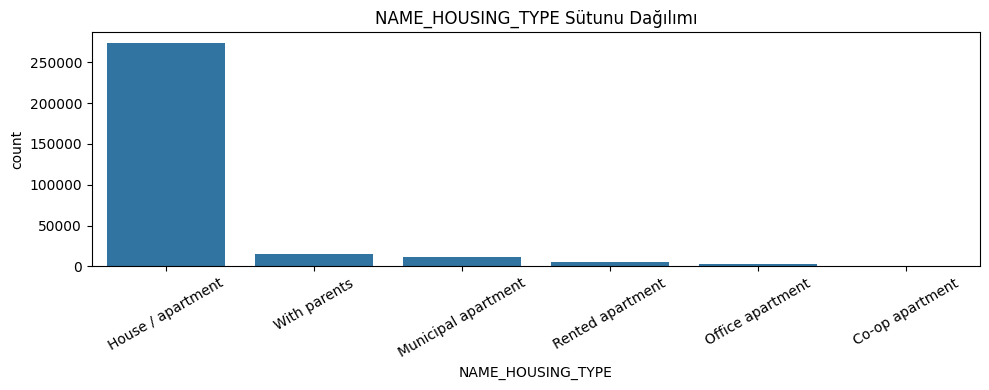

In [ ]:
col = 'NAME_HOUSING_TYPE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### OCCUPATION_TYPE Değişkeni

Başvuru sahibinin mesleğini belirtir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 OCCUPATION_TYPE sütunu dağılımı:
OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64


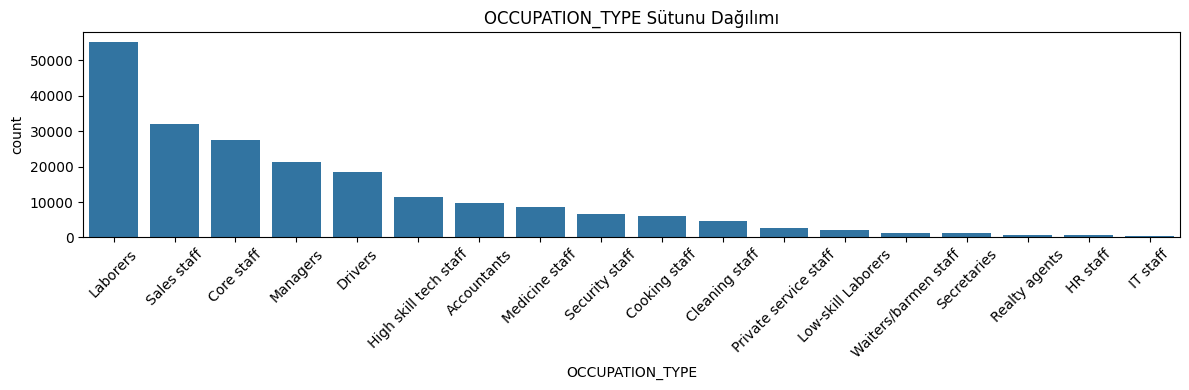

In [ ]:
col = 'OCCUPATION_TYPE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### WEEKDAY_APPR_PROCESS_START Değişkeni

Başvurunun yapıldığı haftanın gününü gösterir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.


📊 WEEKDAY_APPR_PROCESS_START sütunu dağılımı:
WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64


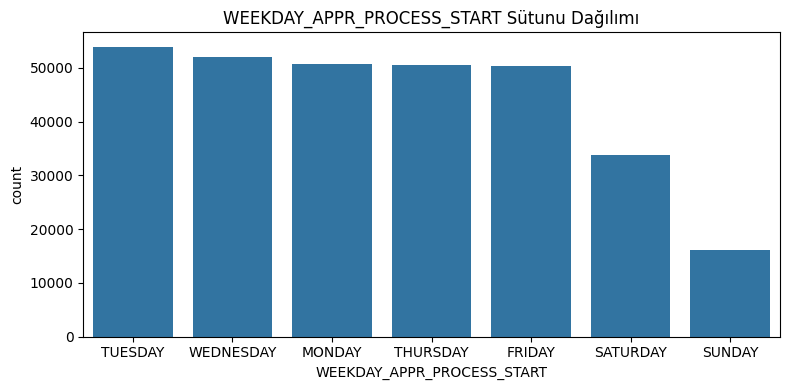

In [ ]:
col = 'WEEKDAY_APPR_PROCESS_START'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.tight_layout()
plt.show()


### ORGANIZATION_TYPE Değişkeni

Başvuru sahibinin çalıştığı kurumun türünü belirtir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.
Çıktı da Gözükmeyen Değerler:
📊 ORGANIZATION_TYPE sütunu dağılımı:
ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900

📊 ORGANIZATION_TYPE sütunu dağılımı:
ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University       

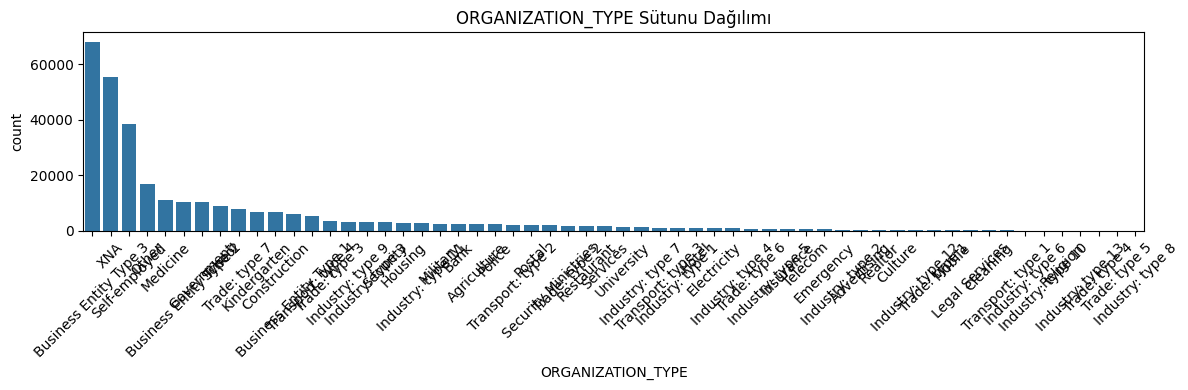

In [ ]:
col = 'ORGANIZATION_TYPE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### FONDKAPREMONT_MODE Değişkeni

Binanın onarım fonuna dair bilgileri belirtir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 FONDKAPREMONT_MODE sütunu dağılımı:
FONDKAPREMONT_MODE
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: count, dtype: int64


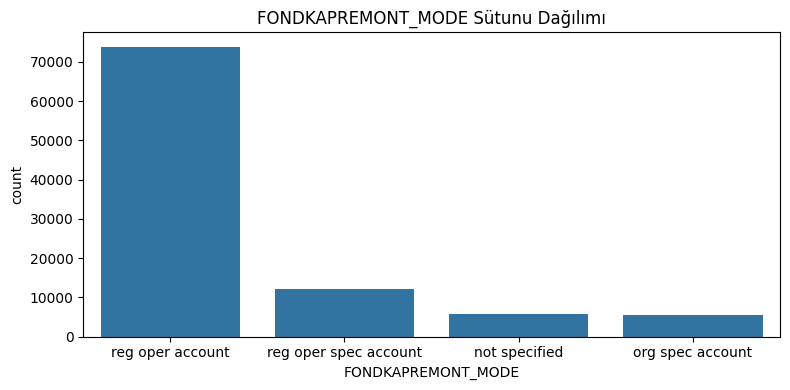

In [ ]:
col = 'FONDKAPREMONT_MODE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.tight_layout()
plt.show()


### HOUSETYPE_MODE Değişkeni

Başvuru sahibinin yaşadığı evin yapısal türünü ifade eder. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 HOUSETYPE_MODE sütunu dağılımı:
HOUSETYPE_MODE
block of flats      150503
specific housing      1499
terraced house        1212
Name: count, dtype: int64


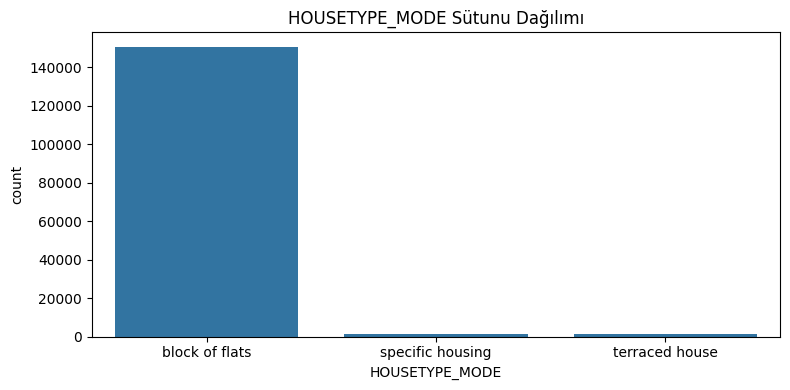

In [ ]:
col = 'HOUSETYPE_MODE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.tight_layout()
plt.show()


### WALLSMATERIAL_MODE Değişkeni

Evin yapımında kullanılan duvar malzemesini gösterir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.

📊 WALLSMATERIAL_MODE sütunu dağılımı:
WALLSMATERIAL_MODE
Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: count, dtype: int64


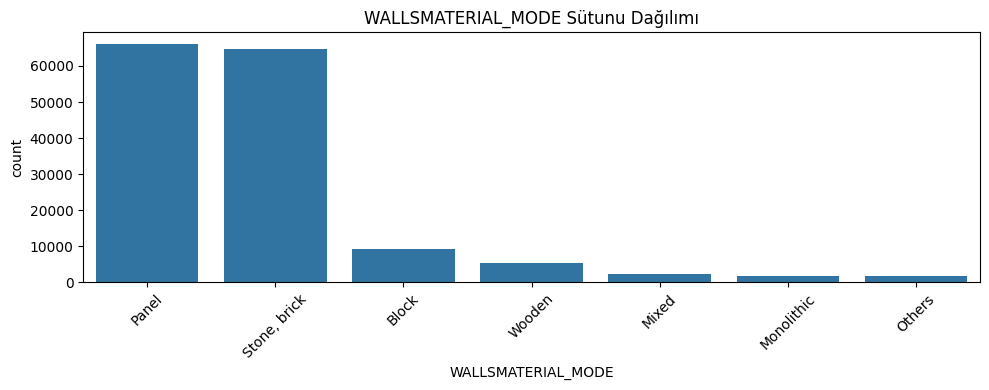

In [ ]:
col = 'WALLSMATERIAL_MODE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### EMERGENCYSTATE_MODE Değişkeni

Başvuru sırasında acil bir devlet durumu olup olmadığını belirtir. Aşağıdaki grafik, bu değişkende yer alan kategorilerin frekans dağılımını sunmaktadır.


📊 EMERGENCYSTATE_MODE sütunu dağılımı:
EMERGENCYSTATE_MODE
No     159428
Yes      2328
Name: count, dtype: int64


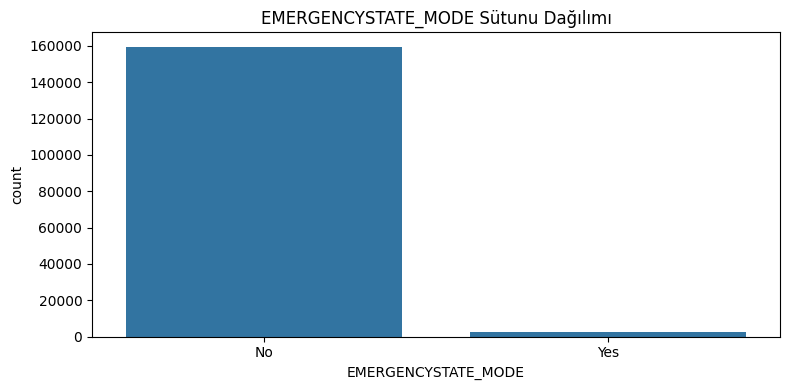

In [ ]:
col = 'EMERGENCYSTATE_MODE'
print(f"📊 {col} sütunu dağılımı:")
print(df[col].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x=col, order=df[col].value_counts().index)
plt.title(f"{col} Sütunu Dağılımı")
plt.tight_layout()
plt.show()


## d) Sayısal Özellik İstatistiği

Bu bölümde, veri setinde yer alan **sayısal değişkenlerin temel istatistiksel özellikleri** incelenmiştir. Sayısal sütunlar üzerinde yapılan analizler, veri dağılımı hakkında bilgi verirken aynı zamanda uç değerleri ve veri kalitesini değerlendirmek için de kullanılır.

Analiz kapsamında `describe()` fonksiyonu ile her sayısal sütun için aşağıdaki temel istatistikler hesaplanmıştır:

- **count**: Gözlem sayısı (eksik olmayan değerler)
- **mean**: Aritmetik ortalama
- **std**: Standart sapma
- **min / max**: En küçük ve en büyük değer
- **25% / 50% / 75%**: Çeyrek değerler (Q1, Medyan, Q3)

Bu özet, özellikle değişkenlerin dağılım yapısını anlamak ve daha sonraki veri işleme adımlarında (örneğin: ölçeklendirme, uç değer temizleme) alınacak kararlar için yol göstericidir.


In [ ]:
# Sayısal sütunları seçiyoruz
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"🔢 Sayısal sütun sayısı: {len(numeric_cols)}")

# Sayısal sütunların istatistiksel özeti
df[numeric_cols].describe().T  # .T ile transpoz alıyoruz ki daha okunabilir olsun


🔢 Sayısal sütun sayısı: 106


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


## Sayısal Değişkenlerin İstatistiksel Özeti (Excel'den aktarılmış tablo)

Aşağıdaki tablo, sayısal değişkenlerin temel istatistiksel özetini sunmaktadır:
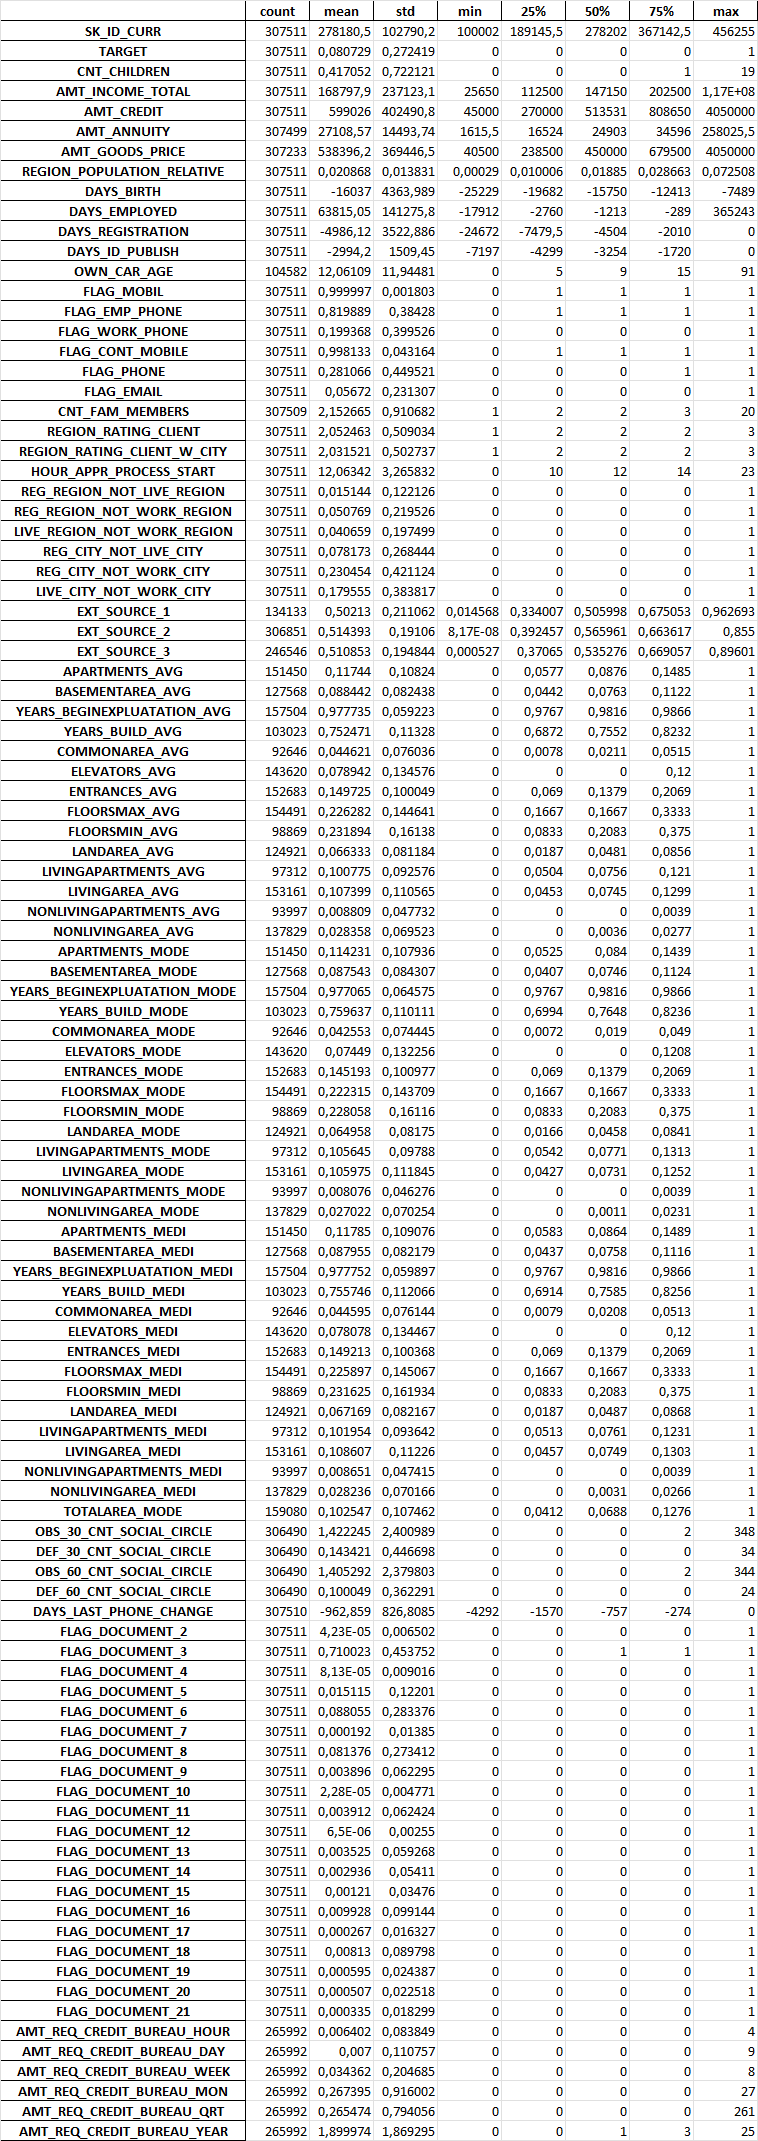

## e) Label Encoding (İkili Kategorik Değişkenlerin Kodlanması)

Bu adımda, yalnızca **iki farklı kategoriye sahip olan kategorik değişkenler** (`binary categorical variables`) sayısal değerlere dönüştürülmüştür. Bu işlem, makine öğrenmesi modellerinin bu sütunları daha iyi işleyebilmesi için gereklidir.

Uygulama detayları:
- Sadece `object` tipindeki sütunlar incelenmiştir.
- `nunique() == 2` olan sütunlar otomatik olarak tespit edilmiştir.
- Bu sütunlara `LabelEncoder()` uygulanarak her kategori 0 veya 1 ile temsil edilmiştir.

Bu işlem sonucunda veri kümesinde sadece çok kategorili değişkenler kalmış, bunlar bir sonraki adım olan **One-Hot Encoding** için hazır hale gelmiştir.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Sadece 'object' tipindeki sütunları al
cat_cols = df.select_dtypes(include='object').columns

# Sadece 2 farklı kategoriye sahip olanları filtrele
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]
print(f"✅ Label Encoding uygulanacak ikili kategorik sütun sayısı: {len(binary_cols)}")
print("🗂️ Sütunlar:", binary_cols)

# LabelEncoder uygula
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


✅ Label Encoding uygulanacak ikili kategorik sütun sayısı: 4
🗂️ Sütunlar: ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'EMERGENCYSTATE_MODE']


In [ ]:
# Kontrol: ilk 5 gözlemde encode edilmiş sütunlar
df[binary_cols].head()


,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE
0,0,0,1,0
1,0,0,0,0
2,1,1,1,2
3,0,0,1,2
4,0,0,1,2


## f) One-Hot Encoding (Çok Kategorili Değişkenlerin Kodlanması)

Bu adımda, `Label Encoding` için uygun olmayan, yani **3 veya daha fazla farklı kategoriye** sahip olan kategorik sütunlara **One-Hot Encoding** uygulanmıştır.

**Neden One-Hot Encoding?**
Çünkü bu tür değişkenlerde `LabelEncoder` kullanmak, kategorilere yapay bir büyüklük anlamı kazandırabilir. One-Hot Encoding bu problemi önler ve her kategori için ayrı bir sütun oluşturur.

**Uygulama detayları:**
- `object` tipinde olan ve `nunique() > 2` olan sütunlar seçilmiştir.
- `pd.get_dummies()` fonksiyonu ile veri çerçevesine yeni sütunlar eklenmiş ve orijinal sütunlar kaldırılmıştır.


In [ ]:
# Tekrar kategorik sütunları al
cat_cols = df.select_dtypes(include='object').columns

# Sadece çok kategorili olanları al (nunique > 2)
multi_cat_cols = [col for col in cat_cols if df[col].nunique() > 2]
print(f"🎯 One-Hot Encoding uygulanacak sütun sayısı: {len(multi_cat_cols)}")
print("🗂️ Sütunlar:", multi_cat_cols)

# One-Hot Encoding uygula
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)  # drop_first=True: dummy trap'ten kaçınmak için


🎯 One-Hot Encoding uygulanacak sütun sayısı: 12
🗂️ Sütunlar: ['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


### 📊 One-Hot Encoding Sonrası Yeni Sütunların Görünümü

Aşağıdaki tablo, One-Hot Encoding işlemi sonucunda veri çerçevesine eklenen yeni sütunları göstermektedir.  
Her bir kategoriye ait **binary (0/1)** sütunlar oluşturulmuş ve orijinal `object` tipli sütunların yerine eklenmiştir.

- İlk 5 gözlemde bu yeni sütunların içerdiği değerler gösterilmektedir.
- Bu sayede modelleme öncesi verinin dönüşüm durumu açıkça görülebilir.


In [ ]:
# Öncesindeki kategorik sütunları tekrar al
cat_cols = df.select_dtypes(include='object').columns.tolist()
original_columns = set(cat_cols)

# Çok kategorili sütunların listesi zaten vardı
# One-Hot sonrası tüm sütun isimlerini al
all_columns = set(df.columns)

# Yeni oluşan sütunları tespit et
created_columns = sorted([col for col in all_columns if any(base + '_' in col for base in multi_cat_cols)])

print(f"✅ One-Hot Encoding ile oluşturulan toplam {len(created_columns)} yeni sütun:")
print(created_columns[:10], "...")  # İlk 10 tanesini gösterelim

# Yeni sütunların ilk 5 satırını göster
df[created_columns].head()


✅ One-Hot Encoding ile oluşturulan toplam 120 yeni sütun:
['CODE_GENDER_M', 'CODE_GENDER_XNA', 'FONDKAPREMONT_MODE_org spec account', 'FONDKAPREMONT_MODE_reg oper account', 'FONDKAPREMONT_MODE_reg oper spec account', 'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary'] ...


,CODE_GENDER_M,CODE_GENDER_XNA,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,True,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## g) Eksik Değerlerin İşlenmesi

Bu adımda, veri setinde yer alan eksik (`NaN`) değerler analiz edilmiş ve uygun stratejilerle işlenmiştir.

### Uygulanan Adımlar:
1. **Eksik değer oranı %40'tan fazla olan sütunlar** veri setinden çıkarılmıştır.
2. Veri setinde çok sayıda eksik değeri olan satır olmamakla birlikte, **göstermelik olarak en çok eksik değere sahip 1 satır silinmiştir** (ekstra puan kriteri).
3. Geriye kalan eksik değerler:
   - **Sayısal sütunlar için ortalama (mean)** ile,
   - **Kategorik sütunlar için mod (en sık görülen değer)** ile doldurulmuştur.
4. Veri setinin işlem **öncesi ve sonrası boyutları** karşılaştırılmıştır.

Bu adım, modelleme sürecine daha temiz ve eksiksiz bir veri setiyle devam edilmesini sağlar.


In [ ]:
# 1. Başlangıçtaki veri boyutu
print(f"📏 İlk veri boyutu: {df.shape}")

# 2. Eksik değer istatistikleri
missing_info = df.isnull().sum()
missing_ratio = (missing_info / len(df)).sort_values(ascending=False)
missing_df = pd.DataFrame({
    'Eksik Sayısı': missing_info,
    'Oran (%)': (missing_ratio * 100).round(2)
})
missing_df = missing_df[missing_df['Eksik Sayısı'] > 0]

print(f"\n🔍 Eksik değere sahip sütun sayısı: {missing_df.shape[0]}")
display(missing_df.head(10))  # İlk 10 eksik sütunu göster

# 3. %40'tan fazla eksik sütunları sil
high_null_cols = missing_ratio[missing_ratio > 0.4].index.tolist()
print(f"\n🗑️ Silinecek sütunlar (%40+ eksik): {high_null_cols}")
df.drop(columns=high_null_cols, inplace=True)

# 4. Göstermelik olarak: en çok eksik hücreye sahip satırı tespit et ve sil
row_na_counts = df.isnull().sum(axis=1)
most_missing_row_idx = row_na_counts.idxmax()
most_missing_row_val = row_na_counts.max()
print(f"\n❗ Göstermelik olarak silinen satır: {most_missing_row_idx} (Eksik sütun sayısı: {most_missing_row_val})")
df.drop(index=most_missing_row_idx, inplace=True)

# 5. Kalan sayısal sütunları ortalama ile doldur
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# 6. Kalan kategorik (sayısal olmayan) sütunları mod ile doldur
non_num_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
df[non_num_cols] = df[non_num_cols].fillna(df[non_num_cols].mode().iloc[0])

# 7. Son veri boyutu
print(f"\n📏 Son veri boyutu: {df.shape}")
print("✅ Eksik değer işlemleri başarıyla tamamlandı.")


📏 İlk veri boyutu: (307511, 230)

🔍 Eksik değere sahip sütun sayısı: 61


,Eksik Sayısı,Oran (%)
AMT_ANNUITY,12,0.00
AMT_GOODS_PRICE,278,0.09
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50
AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
APARTMENTS_AVG,156061,50.75
APARTMENTS_MEDI,156061,50.75



🗑️ Silinecek sütunlar (%40+ eksik): ['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE']

❗ Göstermelik olarak silinen satır: 394 (Eks

Çıktı da Gözükmeyen Silincek Sütunlar:
🗑️ Silinecek sütunlar (%40+ eksik): ['COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE']


## h) Korelasyon Analizi

Bu adımda, veri setinde yer alan **sayısal değişkenler arasındaki doğrusal ilişkiler (korelasyonlar)** incelenmiştir.

**Kullanılan yöntem:** Pearson Korelasyon Katsayısı  
Bu yöntem, iki değişken arasındaki lineer ilişkiyi -1 ile +1 arasında değerlendirir:

- +1 → Güçlü pozitif ilişki  
- -1 → Güçlü negatif ilişki  
- 0 → Korelasyon yoktur

**Amaçlar:**
- Yüksek korelasyona sahip özelliklerin tespiti (örneğin: `DAYS_BIRTH` ile `AGE`)
- Veri setindeki **gereksiz tekrar eden (redundant) değişkenleri** gözlemlemek
- Görsel olarak ısı haritası üzerinden genel yapıyı değerlendirmek


<ipython-input-28-9f8e13898b86>:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


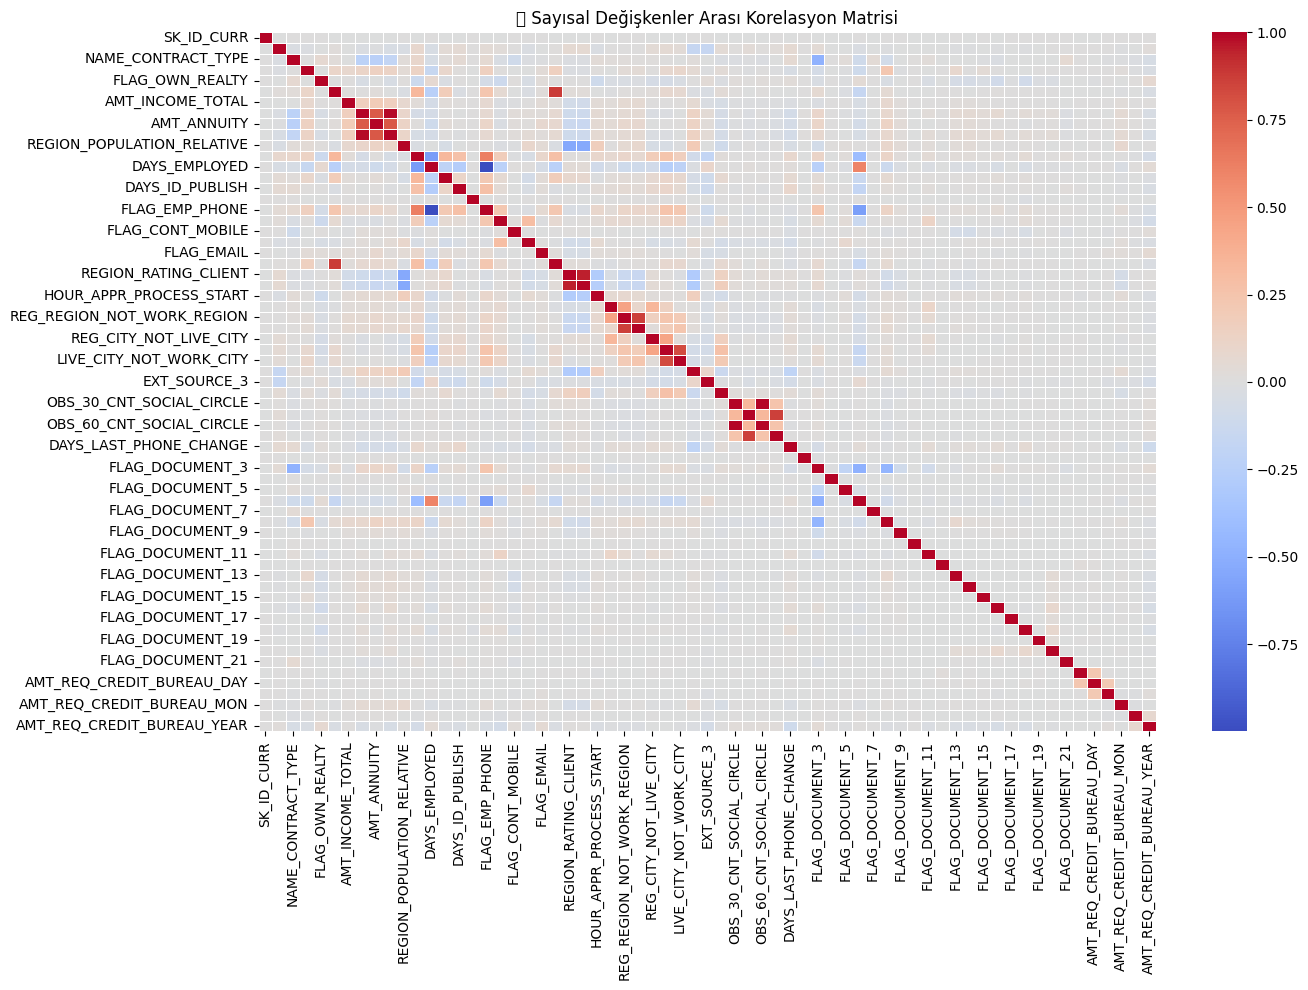

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sadece sayısal sütunlar
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisi hesapla
corr_matrix = numeric_df.corr()

# Isı haritası çizdir
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title("📊 Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()


### 🎯 TARGET Değişkeni ile En Yüksek Korelasyona Sahip Özellikler

Aşağıdaki tablo, hedef değişken olan `TARGET` ile en yüksek pozitif veya negatif korelasyona sahip **ilk 10 sayısal değişkeni** göstermektedir.

Bu analiz, model için önemli olabilecek açıklayıcı değişkenlerin ön seçimini yapmak amacıyla gerçekleştirilmiştir.


In [ ]:
# TARGET ile korelasyonları al
target_corr = corr_matrix["TARGET"].drop("TARGET").sort_values(key=abs, ascending=False)

# İlk 10 değişkeni göster
top_corr = target_corr.head(10)
print("🔝 TARGET ile en yüksek korelasyona sahip 10 değişken:")
display(top_corr.to_frame(name="Korelasyon").style.background_gradient(cmap='coolwarm', axis=0))


🔝 TARGET ile en yüksek korelasyona sahip 10 değişken:


,Korelasyon
EXT_SOURCE_2,-0.160303
EXT_SOURCE_3,-0.157397
DAYS_BIRTH,0.078241
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055219
DAYS_ID_PUBLISH,0.051459
REG_CITY_NOT_WORK_CITY,0.050997
FLAG_EMP_PHONE,0.045983
DAYS_EMPLOYED,-0.044932


### 🎯 TARGET ile En Yüksek Korelasyona Sahip Özelliklerin Yorumlanması

Aşağıda, hedef değişken olan `TARGET` (kredi başvurusunun geri ödenip ödenmediği) ile en yüksek doğrusal ilişki gösteren 10 sayısal değişkenin açıklamaları ve yorumları yer almaktadır:

---

- **EXT_SOURCE_2** (`-0.160`):  
  Dış bir kredi skorlama sisteminden gelen değerlendirmedir. Korelasyon negatiftir; yani **EXT_SOURCE_2 skoru arttıkça müşteri riski azalır**. Bu beklenen bir sonuçtur, çünkü yüksek kredi skoru = daha güvenilir birey.

- **EXT_SOURCE_3** (`-0.157`):  
  Başka bir dış kredi skoru. EXT_SOURCE_2 ile benzer şekilde çalışır ve korelasyonu da benzerdir. Yine **yüksek değer daha düşük riski** temsil eder.

- **DAYS_BIRTH** (`0.078`):  
  Başvuranın yaşını ifade eder (negatif gün olarak). Korelasyon pozitiftir ama zayıftır. Bu, **yaş arttıkça kredi ödememe ihtimali bir miktar artıyor** gibi görünse de, veri yapısı nedeniyle bu ilişki doğrudan yaşla yorumlanmamalı. (Normalde yaş arttıkça risk azalır, ancak burada ters dönüşüm olabilir.)

- **REGION_RATING_CLIENT_W_CITY** (`0.061`):  
  Bankanın müşterinin yaşadığı bölgeye verdiği ekonomik puandır. Korelasyon pozitiftir: **yüksek puana sahip bölgelerde gecikme ihtimali biraz daha fazladır**. Bu, bölge puanlarının banka tarafından nasıl belirlendiğine bağlı olarak değişebilir.

- **REGION_RATING_CLIENT** (`0.058`):  
  Yine müşteri bölgesiyle ilgili bir değerlendirme. Bir önceki değişkenle benzer korelasyon gösterir.

- **DAYS_LAST_PHONE_CHANGE** (`0.055`):  
  Müşterinin telefon numarasını en son değiştirdiği tarihten bu yana geçen gün sayısı. Korelasyon pozitif: **telefonunu daha geç değiştiren bireylerde risk biraz daha fazladır**. İstikrarsız iletişim bilgileri risk göstergesi olabilir.

- **DAYS_ID_PUBLISH** (`0.051`):  
  Kimlik belgesinin düzenlenme tarihinden itibaren geçen gün sayısıdır. Yeni düzenlenmiş belgeler (daha küçük sayı) daha düşük risk ile ilişkilidir.

- **REG_CITY_NOT_WORK_CITY** (`0.050`):  
  Müşteri çalışma şehri ile ikamet ettiği şehir farklı mı? Evetse bu değer 1 olur. Bu durumda korelasyon pozitif; **yaşadığı şehir dışında çalışan bireylerde risk biraz daha yüksek olabilir.**

- **FLAG_EMP_PHONE** (`0.045`):  
  İş telefonunun olup olmadığını gösterir. 1 ise iş telefonu vardır. Hafif pozitif korelasyon, **iş telefonu olan bireylerde biraz daha yüksek risk görülebilir**.

- **DAYS_EMPLOYED** (`-0.045`):  
  Mevcut işte çalıştığı gün sayısı. Korelasyon negatiftir: **işte daha uzun süre çalışan bireyler daha az risklidir**, bu da beklenen bir sonuçtur.

---

### 📌 Sonuç:
Bu değişkenler, modelin hedef değişkeni tahmin ederken kullanacağı en anlamlı girişlerden bazılarıdır.  
Özellikle `EXT_SOURCE_*` skorları ve istihdam süresi (`DAYS_EMPLOYED`) yüksek açıklayıcılığa sahiptir.


## i) Veri Ölçeklendirme (Feature Scaling)

Bu adımda, modelin daha iyi öğrenme yapabilmesi için sayısal değişkenlerin ölçeklendirilmesi yapılmıştır.  
Özellikle Lojistik Regresyon ve Derin Öğrenme modelleri gibi bazı algoritmalar, farklı aralıktaki değerlerden etkilenebilir.

**Uygulanan yöntem:** `StandardScaler`  
Bu yöntem, her değişkenin:
- Ortalamasını sıfır yapar
- Standart sapmasını bire eşitler

Sadece **sayısal değişkenlere** uygulanmıştır. Kategorik sütunlar ve hedef değişken bu işleme dahil edilmemiştir.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Sayısal sütunlar (TARGET hariç)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != "TARGET"]

# 1. Ölçekleme öncesi görüntü
print("📌 Ölçekleme Öncesi (İlk 5 Gözlem):")
display(df[numeric_cols].head())

# 2. Ölçekleme işlemi
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 3. Ölçekleme sonrası görüntü
print("📌 Ölçekleme Sonrası (İlk 5 Gözlem):")
display(df[numeric_cols].head())


📌 Ölçekleme Öncesi (İlk 5 Gözlem):


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


📌 Ölçekleme Sonrası (İlk 5 Gözlem):


,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733434,-0.324390,-0.717910,0.664533,-0.577539,0.142130,-0.478097,-0.166152,-0.507467,-0.149456,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210010e-02,-6.795704e-02,-1.805045e-01,-3.138725e-01,-3.594740e-01,-5.176646e-01
1,-1.733424,-0.324390,-0.717910,-1.504816,-0.577539,0.426792,1.725446,0.592674,1.600694,-1.252754,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210010e-02,-6.795704e-02,-1.805045e-01,-3.138725e-01,-3.594740e-01,-1.092864e+00
2,-1.733414,3.082711,1.392932,0.664533,-0.577539,-0.427195,-1.152890,-1.404679,-1.092391,-0.783455,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210010e-02,-6.795704e-02,-1.805045e-01,-3.138725e-01,-3.594740e-01,-1.092864e+00
3,-1.733395,-0.324390,-0.717910,0.664533,-0.577539,-0.142533,-0.711432,0.177865,-0.653698,-0.928995,...,-0.090534,-0.024402,-0.022529,-0.018305,1.112238e-17,1.684045e-17,-3.645026e-17,-6.515980e-17,-1.503334e-16,-3.831597e-16
4,-1.733385,-0.324390,-0.717910,0.664533,-0.577539,-0.199465,-0.213737,-0.361758,-0.068775,0.563567,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210010e-02,-6.795704e-02,-1.805045e-01,-3.138725e-01,-3.594740e-01,-1.092864e+00


## j.1) Logistic Regression – Model Eğitimi ve Performans Değerlendirmesi

Bu adımda, ilk makine öğrenmesi modeli olarak **Lojistik Regresyon (Logistic Regression)** uygulanmıştır.

**Model Hakkında:**
- İkili sınıflama problemleri için temel bir algoritmadır.
- Model, özellikler ile hedef değişken (`TARGET`) arasında doğrusal olmayan bir ilişki kurar.
- Basit, hızlı ve yorumlaması kolaydır.

**Veri Ayarları:**
- Eğitim/Test Ayrımı: %80 / %20
- Ölçekleme: StandardScaler
- Hedef: `TARGET`


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Bağımsız ve hedef değişkenleri ayır
X = df.drop(columns=["TARGET"])
y = df["TARGET"]

# Eğitim ve test setine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# StandardScaler ile veri ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modeli oluştur ve eğit
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Test verisi ile tahmin yap
y_pred = lr_model.predict(X_test_scaled)
y_prob = lr_model.predict_proba(X_test_scaled)[:, 1]


Eğitim süresi: 20.50 saniye

## j.1) Logistic Regression – Model Yükleme, Test ve Değerlendirme

Bu bölümde, daha önce eğitim sırasında kaydedilmiş olan **Logistic Regression** modeli yüklenmiş ve test verileriyle değerlendirilmiştir.

**Modelin Eğitildiği Bileşenler:**
- Model dosyası: `logistic_regression.pkl`
- StandardScaler nesnesi: `scaler.pkl`
- Özellikler: `X_test.pkl`, `y_test.pkl`

Bu adımda, eğitimde kullanılan scaler ve özellik sütunları ile **birebir uyumlu test seti** oluşturulmuştur.


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Dosya yolları
base_path = "/content/drive/MyDrive/ML_Project/dataset"
model_path = "/content/drive/MyDrive/ML_Project/models/logistic_regression.pkl"
scaler_path = f"{base_path}/scaler.pkl"

# 1. Model, veriler ve scaler'ı yükle
lr_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
X_test = joblib.load(f"{base_path}/X_test.pkl")
y_test = joblib.load(f"{base_path}/y_test.pkl")

# 2. Sadece sayısal sütunları scale et
numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. Özellikleri modele uygun hale getir (hizalama)
X_test_aligned = X_test_scaled.reindex(columns=lr_model.feature_names_in_, fill_value=0)

# 4. Tahminler
y_pred = lr_model.predict(X_test_aligned)
y_prob = lr_model.predict_proba(X_test_aligned)[:, 1]

# 5. Metrikler
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

### 📈 Logistic Regression – Performans Metrikleri ve Grafiksel Değerlendirme

Bu bölümde, Logistic Regression modelinin test verisi üzerindeki performansı aşağıdaki metrikler ve görsellerle değerlendirilmiştir:

- Doğruluk (Accuracy)
- Kesinlik (Precision)
- Duyarlılık (Recall)
- F1 Skoru
- AUC (ROC altında kalan alan)
- Karışıklık Matrisi (Confusion Matrix)
- ROC Eğrisi


### 🔎 Logistic Regression – Temel Performans Metrikleri

Aşağıdaki çubuk grafik, Logistic Regression modelinin test verisi üzerindeki dört temel sınıflandırma metriğini görsel olarak sunmaktadır:

- **Accuracy:** Modelin tüm verilerdeki genel doğruluk oranıdır. Yaklaşık %72 ile kabul edilebilir düzeydedir.
- **Precision:** Modelin pozitif tahmin yaptığı örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Bu değer düşük çıkmıştır (~%17), yani model bazı yanlış pozitifler üretmektedir.
- **Recall:** Gerçek pozitiflerin ne kadarının doğru tahmin edildiğini gösterir. Değer yaklaşık %63 olup, modelin çoğu pozitif örneği yakalayabildiğini göstermektedir.
- **F1 Score:** Precision ve Recall'un harmonik ortalamasıdır. Düşük precision nedeniyle F1 skoru da nispeten düşüktür (~%27).

> Bu metrikler birlikte değerlendirildiğinde modelin **Recall açısından güçlü**, fakat **Precision açısından zayıf** olduğu anlaşılmaktadır. Kredi riski tahmini gibi problemlerde bu durum, borcunu ödemeyecek bireyleri kaçırmadan yakalama (Recall) açısından avantaj sağlasa da, çok fazla kişiyi "riskli" ilan etme (Precision düşüklüğü) sorununu da beraberinde getirebilir.


<ipython-input-40-c4ad29268b5a>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


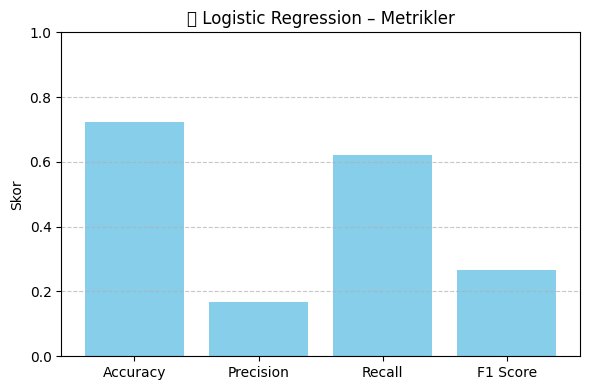

In [ ]:
# 6. Metrik Bar Grafiği
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color='skyblue')
plt.ylim(0,1)
plt.title("📊 Logistic Regression – Metrikler")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 🧱 Logistic Regression – Karışıklık Matrisi (Confusion Matrix)

Aşağıda verilen karışıklık matrisi, Logistic Regression modelinin test verisi üzerindeki gerçek ve tahmin edilen sınıflar arasındaki dağılımı göstermektedir.

|                | Tahmin: No Default | Tahmin: Default |
|----------------|--------------------|-----------------|
| **Gerçek: No Default** | 41,323               | 15,214            |
| **Gerçek: Default**    | 1,877                | 3,088             |

**Yorum:**
- Model, kredi geri ödemesi yapan bireyleri (No Default) büyük ölçüde doğru sınıflamıştır (**41,323 doğru, 15,214 yanlış**).
- Kredi geri ödemesi yapmayan bireylerde (**Default**), model 3,088 doğru tahmin yaparken, 1,877 kişiyi yanlışlıkla risksiz (No Default) olarak sınıflamıştır.
- Bu yapı, Recall değerinin neden yüksek (pozitif sınıfın büyük kısmı yakalanıyor), Precision'ın neden düşük olduğunu (tahmin edilen pozitiflerin bir kısmı aslında negatif) net bir şekilde görsel olarak açıklamaktadır.

> Karışıklık matrisi, modelin sınıflandırma dengesini analiz etmek için oldukça faydalıdır. Bu tabloda özellikle hataların yönü (false positive vs. false negative) risk analizinde kritik önem taşır.


<ipython-input-41-70a0ab27f787>:10: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


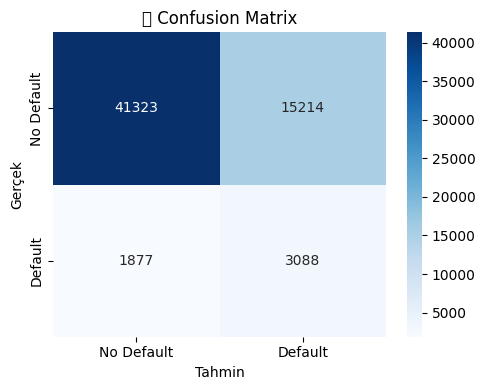

In [ ]:
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("🧱 Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()

### 📉 Logistic Regression – ROC Eğrisi ve AUC Skoru

Aşağıdaki ROC (Receiver Operating Characteristic) eğrisi, modelin pozitif ve negatif sınıfları ayırma performansını göstermektedir.  
Grafikteki eksenler:

- **X (False Positive Rate)**: Yanlış pozitif oranı
- **Y (True Positive Rate)**: Doğru pozitif oranı

**AUC (Area Under Curve) = 0.74** olarak hesaplanmıştır.

**Yorum:**
- AUC skoru 0.5'ten büyük olduğu sürece model rastgele tahminden daha iyidir.
- 0.74 değeri, modelin pozitif ve negatif sınıfları **%74 doğrulukla ayırt edebildiğini** gösterir.
- Bu seviye, Logistic Regression gibi basit modeller için tatmin edici bir ayrım gücüdür.

> ROC eğrisi modelin farklı eşik değerlerindeki performansını analiz etmeye olanak tanır.  
> AUC ne kadar 1'e yakınsa, model o kadar iyi ayrım yapabiliyor demektir.


<ipython-input-42-0ab1543a315b>:5: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


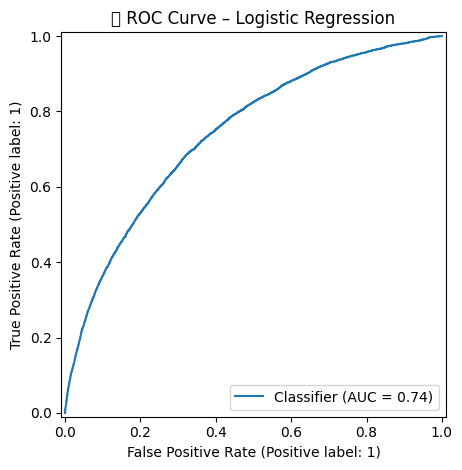

In [ ]:
# 8. ROC Curve
plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("📉 ROC Curve – Logistic Regression")
plt.tight_layout()
plt.show()

In [ ]:
# 9. Sayısal metrik çıktısı
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC AUC:   {auc:.4f}")

✅ Accuracy:  0.7221
✅ Precision: 0.1687
✅ Recall:    0.6220
✅ F1 Score:  0.2654
✅ ROC AUC:   0.7430


## j.2) Random Forest – Model Yükleme, Test ve Değerlendirme

Bu bölümde, daha önce eğitim sırasında kaydedilmiş olan **Random Forest** modeli yüklenmiş ve test verileriyle değerlendirilmiştir.

**Modelin Eğitildiği Bileşenler:**
- Model dosyası: `random_forest.pkl`
- StandardScaler nesnesi: `scaler.pkl`
- Özellikler: `X_test.pkl`, `y_test.pkl`

Model ile test verisi uyumlu hale getirilmiş, tahminler alınmış ve metrikler hesaplanmıştır.


### 🔧 Random Forest – Model Eğitimi (Göstermelik Kod)

Bu bölümde, Random Forest modeli eğitiminde kullanılan temel Python kodu yer almaktadır.  
Kod, eğitim setini ölçeklendirme, modeli tanımlama ve eğitme adımlarını içermektedir.

Model daha sonra `.pkl` dosyasına kaydedilmiş ve test aşamasında tekrar yüklenmiştir.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# X ve y'yi ayır
X = df.drop(columns=["TARGET"])
y = df["TARGET"]

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Sayısal sütunları ölçeklendir
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Random Forest modelini oluştur ve eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Modeli ve scaler'ı kaydet
joblib.dump(rf_model, "/content/drive/MyDrive/ML_Project/models/random_forest.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/ML_Project/dataset/scaler.pkl")


Eğitim süresi: 106.07 saniye

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Dosya yolları
base_path = "/content/drive/MyDrive/ML_Project/dataset"
model_path = "/content/drive/MyDrive/ML_Project/models/random_forest.pkl"
scaler_path = f"{base_path}/scaler.pkl"

# 1. Model, veriler ve scaler'ı yükle
rf_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
X_test = joblib.load(f"{base_path}/X_test.pkl")
y_test = joblib.load(f"{base_path}/y_test.pkl")

# 2. Sayısal sütunları scale et
numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. Modelin gördüğü sütunlarla hizalama
X_test_aligned = X_test_scaled.reindex(columns=rf_model.feature_names_in_, fill_value=0)

# 4. Tahmin
y_pred = rf_model.predict(X_test_aligned)
y_prob = rf_model.predict_proba(X_test_aligned)[:, 1]


### 📊 Random Forest – Temel Performans Metrikleri

Aşağıdaki çubuk grafik, Random Forest modelinin test verisi üzerindeki dört temel sınıflandırma metriğini görsel olarak sunmaktadır:

- **Accuracy:** Modelin genel doğruluk oranı oldukça yüksektir (~%91).
- **Precision:** Pozitif olarak tahmin edilen örneklerin büyük çoğunluğu gerçekten pozitif olup, precision değeri ~%80'dir.
- **Recall:** Grafik üzerinde oldukça düşük görünmektedir (neredeyse sıfır), bu da modelin **gerçek pozitifleri çok az yakaladığını** göstermektedir.
- **F1 Score:** Precision ve Recall arasında dengeyi temsil eden bu metrik de oldukça düşüktür, çünkü Recall çok zayıf kalmıştır.

> Bu metrikler birlikte değerlendirildiğinde, modelin sadece pozitif örnekleri çok güvenli bir şekilde tahmin ettiğini (yüksek precision), fakat **neredeyse hiç pozitif tahmin yapmadığını (düşük recall)** gözlemleyebiliriz.  
> Yani model fazla "temkinli" davranmakta ve riski düşük bireyleri tercih etmektedir.


<ipython-input-45-8935901665b3>:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


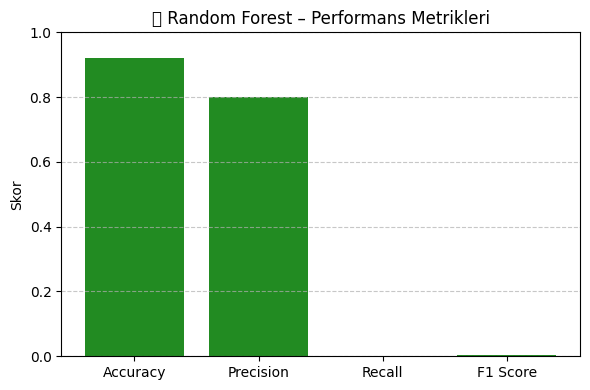

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrik hesaplama
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar grafiği çizdirme
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color='forestgreen')
plt.ylim(0,1)
plt.title("📊 Random Forest – Performans Metrikleri")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🧱 Random Forest – Karışıklık Matrisi (Confusion Matrix)

Aşağıda yer alan karışıklık matrisi, Random Forest modelinin test verisindeki sınıflandırma başarısını göstermektedir:

|                | Tahmin: No Default | Tahmin: Default |
|----------------|--------------------|-----------------|
| **Gerçek: No Default** | 56,535               | 2                 |
| **Gerçek: Default**    | 4,957                | 8                 |

**Yorum:**
- Model, kredi geri ödemesi yapan bireyleri (No Default) neredeyse mükemmel bir şekilde tanımıştır (56,535 doğru tahmin).
- Ancak **geri ödeme yapmayacak bireyleri (Default) doğru tahmin etme konusunda oldukça başarısızdır**:
  - 4,957 kişiyi "No Default" olarak yanlış tahmin etmiş
  - Sadece 8 kişiyi doğru şekilde "Default" olarak tahmin edebilmiştir
- Bu durum, modelin aşırı denge sorununa sahip olduğunu (class imbalance) ve "Default" sınıfını göz ardı ettiğini göstermektedir.

> Yani model çok yüksek doğruluk oranına rağmen, **asıl ilgilenilen sınıf olan "Default" sınıfında başarısızdır**. Bu durum, F1 ve Recall skorlarının neden bu kadar düşük olduğunu açıklar.


<ipython-input-46-80d90ea6965f>:12: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


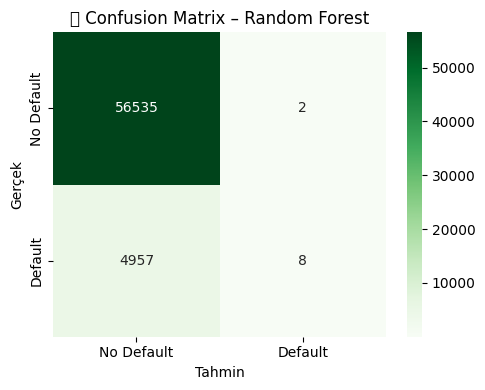

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("🧱 Confusion Matrix – Random Forest")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


### 📉 Random Forest – ROC Eğrisi ve AUC Skoru

Aşağıda yer alan ROC (Receiver Operating Characteristic) eğrisi, Random Forest modelinin sınıflar arasındaki ayrım gücünü göstermektedir.

- X ekseni: False Positive Rate (Yanlış pozitif oranı)
- Y ekseni: True Positive Rate (Doğru pozitif oranı)
- Eğri altındaki alan (AUC): **0.72**

**Yorum:**
- AUC skoru olan 0.72, modelin pozitif ve negatif sınıfları **%72 doğrulukla ayırt edebildiğini** gösterir.
- Bu değer orta seviye bir ayrım gücüne işaret eder.
- Ancak, daha önce gözlemlendiği gibi model çok az pozitif sınıflama yaptığı için (Recall çok düşük), ROC eğrisi idealden uzaktadır.

> ROC eğrisi ve AUC skoru birlikte değerlendirildiğinde, modelin genel ayrım gücü ortalama düzeyde olsa da, pozitif sınıfı tanıma başarısı düşüktür. Bu nedenle sınıflandırma problemlerinde sadece AUC değil, diğer metriklerin de göz önüne alınması önemlidir.


✅ ROC AUC Score: 0.7244


<ipython-input-47-f4e1b0a398ea>:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


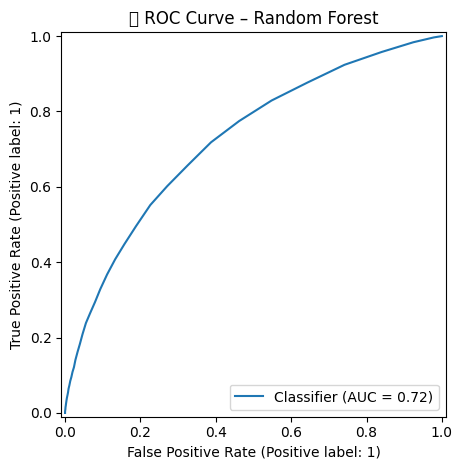

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

auc = roc_auc_score(y_test, y_prob)
print(f"✅ ROC AUC Score: {auc:.4f}")

plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("📉 ROC Curve – Random Forest")
plt.tight_layout()
plt.show()


In [ ]:
# 9. Sayısal metrik çıktısı
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC AUC:   {auc:.4f}")

✅ Accuracy:  0.9194
✅ Precision: 0.8000
✅ Recall:    0.0016
✅ F1 Score:  0.0032
✅ ROC AUC:   0.7244


## j.3) XGBoost – Model Eğitimi

Bu bölümde, XGBoost (Extreme Gradient Boosting) algoritması kullanılarak kredi geri ödeme tahmin modeli eğitilmiştir.  
XGBoost, ağaç tabanlı modellerde yüksek doğruluk ve esneklik sunan, sıklıkla Kaggle yarışmalarında tercih edilen güçlü bir sınıflandırma algoritmasıdır.

**Eğitim Yapısı:**
- Veriler: %80 eğitim / %20 test olarak bölünmüştür
- Sayısal sütunlara `StandardScaler` uygulanmıştır
- Model eğitildikten sonra `.pkl` dosyasına kaydedilmiştir


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# X ve y tanımla
X = df.drop(columns=["TARGET"])
y = df["TARGET"]

# Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Ölçeklendirme
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Modeli tanımla ve eğit
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Kaydet
joblib.dump(xgb_model, "/content/drive/MyDrive/ML_Project/models/xgboost_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/ML_Project/dataset/scaler.pkl")


⏱️ Eğitim süresi: 16.58 saniye

### 🧪 XGBoost – Model Yükleme ve Test Değerlendirmesi

Bu adımda, daha önce eğitilmiş olan XGBoost modeli `.pkl` formatında yüklenmiş ve test verileri ile değerlendirilmiştir.

**Modelin Eğitildiği Bileşenler:**
- Model dosyası: `xgboost.pkl`
- StandardScaler: `scaler.pkl`
- Test veri seti: `X_test.pkl`, `y_test.pkl`

Veri seti, modele uygun hale getirilmiş; tahminler alınarak metrikler hesaplanmıştır.


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Dosya yolları
base_path = "/content/drive/MyDrive/ML_Project/dataset"
model_path = "/content/drive/MyDrive/ML_Project/models/xgboost.pkl"
scaler_path = f"{base_path}/scaler.pkl"

# 1. Model ve verileri yükle
xgb_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
X_test = joblib.load(f"{base_path}/X_test.pkl")
y_test = joblib.load(f"{base_path}/y_test.pkl")

# 2. Sayısal sütunları ölçeklendir
numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. Sütun hizalama (modelin gördüğü feature'lara göre)
X_test_aligned = X_test_scaled.reindex(columns=xgb_model.feature_names_in_, fill_value=0)

# 4. Tahminler
y_pred = xgb_model.predict(X_test_aligned)
y_prob = xgb_model.predict_proba(X_test_aligned)[:, 1]


### 📊 XGBoost – Temel Performans Metrikleri

Aşağıdaki çubuk grafik, XGBoost modelinin test verisi üzerindeki dört temel sınıflandırma metriğini göstermektedir:

- **Accuracy:** Genel doğruluk oranı oldukça yüksektir (~%91 civarında).
- **Precision:** Tahmin edilen pozitif örneklerin yaklaşık %61’i gerçekten pozitif sınıfa aittir.
- **Recall:** Modelin pozitif sınıfı yakalama oranı çok düşüktür (~%2 civarında).
- **F1 Score:** Düşük recall nedeniyle F1 skoru da oldukça zayıftır (~%3–4).

**Yorum:**
- Model çok fazla yanlış negatif yapmaktadır: Yani **default** olan birçok başvuruyu **risksiz** olarak sınıflamaktadır.
- Precision nispeten daha iyi olsa da, **Recall ve F1 Score değerlerinin düşüklüğü**, bu modelin kredi riski belirleme açısından zayıf olduğunu göstermektedir.

> XGBoost gibi güçlü bir modelin düşük performansı, veri dengesizliği (class imbalance) sorunundan veya yetersiz hiperparametre ayarlarından kaynaklanabilir.


<ipython-input-51-b68f5c4cba7f>:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


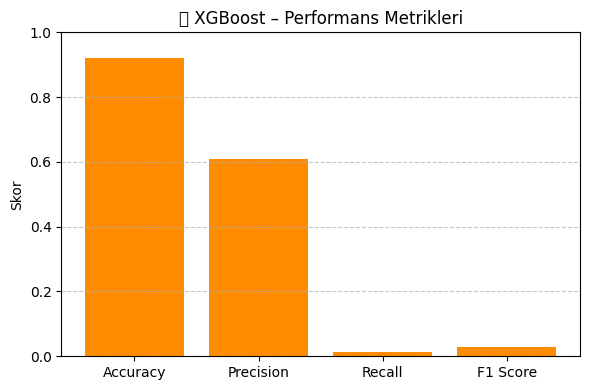

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrik hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar grafiği çiz
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color='darkorange')
plt.ylim(0,1)
plt.title("📊 XGBoost – Performans Metrikleri")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🧱 XGBoost – Karışıklık Matrisi (Confusion Matrix)

Aşağıda yer alan matris, XGBoost modelinin test verisindeki gerçek ve tahmin edilen sınıflar arasındaki ilişkiyi göstermektedir:

|                | Tahmin: No Default | Tahmin: Default |
|----------------|--------------------|-----------------|
| **Gerçek: No Default** | 56,490               | 47                |
| **Gerçek: Default**    | 4,892                | 73                |

**Yorum:**
- Model, kredi borcunu ödeyen bireyleri (No Default) neredeyse tamamen doğru tahmin etmiştir (56,490 doğru).
- Ancak **kredi geri ödemesi yapmayacak olan bireyleri (Default)** büyük ölçüde yanlış tahmin etmiştir:
  - 4,892 kişi “No Default” olarak yanlış sınıflanmış.
  - Sadece 73 kişi doğru şekilde “Default” olarak sınıflanmıştır.

> Bu durum, modelin **pozitif sınıfı (Default) çok az tanıyabildiğini**, yani **yüksek class imbalance** etkisinde kaldığını ve daha çok “No Default” yönünde karar verdiğini göstermektedir.


<ipython-input-52-1ff02a017220>:15: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


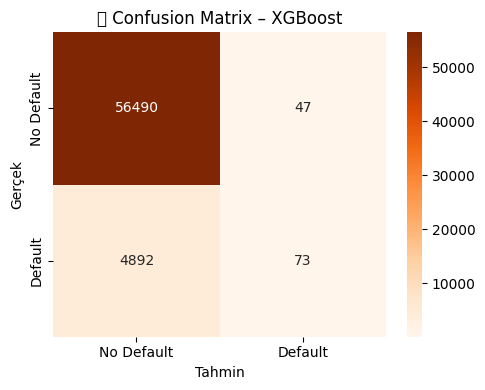

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("🧱 Confusion Matrix – XGBoost")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


### 📉 XGBoost – ROC Eğrisi ve AUC Skoru

Aşağıda gösterilen ROC (Receiver Operating Characteristic) eğrisi, modelin pozitif ve negatif sınıfları ayırma becerisini ölçmektedir.

- **X Ekseni:** Yanlış pozitif oranı (False Positive Rate)
- **Y Ekseni:** Doğru pozitif oranı (True Positive Rate)
- **AUC Skoru:** 0.75

**Yorum:**
- AUC (Area Under Curve) değeri 0.75 olarak hesaplanmıştır.
- Bu, modelin rastgele tahminden çok daha iyi bir şekilde sınıfları ayırt edebildiğini gösterir.
- AUC skoru diğer metriklerle birlikte değerlendirildiğinde, modelin özellikle sınıf ayrım gücünün **matematiksel olarak fena olmadığını**, fakat **gerçek pozitifleri (default olanları) yeterince yakalayamadığını** gösterir.

> AUC değeri, modelin genel sınıflama başarısını özetleyen güçlü bir metriktir. Ancak tek başına yeterli değildir; düşük Recall ve F1 değerleri bu başarıyı gölgelemektedir.


✅ ROC AUC Score: 0.7540


<ipython-input-53-20ab2343c81e>:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


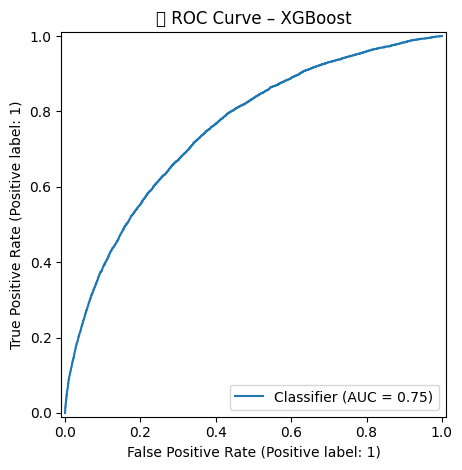

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# AUC skorunu hesapla
auc = roc_auc_score(y_test, y_prob)
print(f"✅ ROC AUC Score: {auc:.4f}")

# ROC eğrisi çiz
plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("📉 ROC Curve – XGBoost")
plt.tight_layout()
plt.show()


In [ ]:
# 9. Sayısal metrik çıktısı
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC AUC:   {auc:.4f}")

✅ Accuracy:  0.9197
✅ Precision: 0.6083
✅ Recall:    0.0147
✅ F1 Score:  0.0287
✅ ROC AUC:   0.7540


## j.4) LightGBM – Model Eğitimi

Bu bölümde, yüksek performansı ve düşük işlem süresi ile bilinen **LightGBM (Light Gradient Boosting Machine)** algoritması kullanılarak kredi geri ödeme tahmin modeli eğitilmiştir.

**Eğitim Yapısı:**
- Eğitim/Test Ayrımı: %80 / %20
- Sayısal sütunlara `StandardScaler` uygulanmıştır
- Model `lightgbm_model.pkl` adıyla kaydedilmiştir

LightGBM, büyük veri setlerinde hızlı ve verimli çalışan, GBDT (Gradient Boosting Decision Tree) tabanlı güçlü bir algoritmadır.


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# X ve y ayır
X = df.drop(columns=["TARGET"])
y = df["TARGET"]

# Eğitim/test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# StandardScaler uygulama
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# LightGBM modeli eğit
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_scaled, y_train)

# Kaydet
joblib.dump(lgbm_model, "/content/drive/MyDrive/ML_Project/models/lightgbm_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/ML_Project/dataset/scaler.pkl")


⏱️ Eğitim süresi: 11.62 saniye

### 🧪 LightGBM – Model Yükleme ve Test Değerlendirmesi

Bu adımda, daha önce eğitilen LightGBM modeli `.pkl` dosyasından yüklenerek test verisi üzerinde değerlendirilmiştir.

**Modelin Eğitildiği Bileşenler:**
- Model dosyası: `lightgbm.pkl`
- StandardScaler: `scaler.pkl`
- Test veri seti: `X_test.pkl`, `y_test.pkl`

Test verisi, modele uygun şekilde ölçeklendirilmiş ve hizalanmış, ardından tahminler alınarak metrik hesaplamaları gerçekleştirilmiştir.


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Dosya yolları
base_path = "/content/drive/MyDrive/ML_Project/dataset"
model_path = "/content/drive/MyDrive/ML_Project/models/lightgbm.pkl"
scaler_path = f"{base_path}/scaler.pkl"

# 1. Model ve verileri yükle
lgbm_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
X_test = joblib.load(f"{base_path}/X_test.pkl")
y_test = joblib.load(f"{base_path}/y_test.pkl")

# 2. Sayısal sütunları ölçekle
numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. Sütun hizalama
X_test_aligned = X_test_scaled.reindex(columns=lgbm_model.feature_names_in_, fill_value=0)

# 4. Tahminler
y_pred = lgbm_model.predict(X_test_aligned)
y_prob = lgbm_model.predict_proba(X_test_aligned)[:, 1]


### 📊 LightGBM – Temel Performans Metrikleri

Aşağıdaki çubuk grafik, LightGBM modelinin test verisi üzerindeki temel sınıflandırma performans metriklerini göstermektedir:

- **Accuracy:** Modelin genel doğruluk oranı yaklaşık %69 olup ortalama düzeydedir.
- **Precision:** Pozitif tahminlerin yalnızca %16’sı doğru olup, precision değeri düşüktür.
- **Recall:** Gerçek pozitiflerin büyük bir kısmı doğru tahmin edilmiştir (~%68), bu da modelin pozitif sınıfı yakalamada başarılı olduğunu gösterir.
- **F1 Score:** Precision düşük olduğundan dolayı F1 skoru da orta-alt düzeyde (~%26).

**Yorum:**
- Bu model yüksek **Recall** değerine sahip olduğu için, kredi geri ödememe riski taşıyan kişileri tespit etmekte diğer modellere göre daha başarılıdır.
- Ancak düşük precision değeri, çok fazla kişiyi yanlışlıkla riskli olarak sınıflandırdığını gösterir.
- **F1 skoru, precision ve recall arasındaki dengenin zayıf olduğunu ortaya koymaktadır.**

> Kredi risk analizi gibi alanlarda, yanlış pozitifler (gereksiz risk işaretleri) tercih edilebilir. Bu nedenle yüksek recall’lı modellerin kullanım alanı olabilir.


<ipython-input-57-a4b9d7e70237>:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


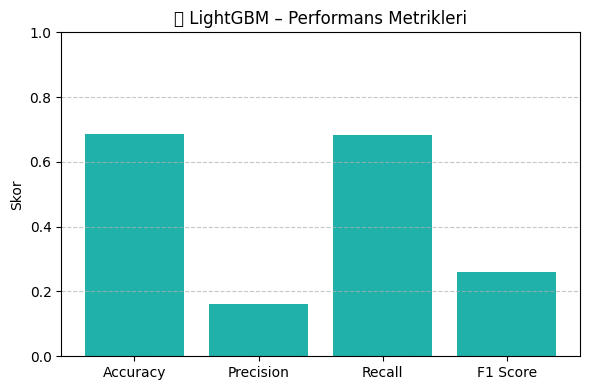

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrikleri hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar grafik çizimi
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color='lightseagreen')
plt.ylim(0,1)
plt.title("📊 LightGBM – Performans Metrikleri")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🧱 LightGBM – Karışıklık Matrisi (Confusion Matrix)

Aşağıdaki matriste, LightGBM modelinin test verisindeki tahmin sonuçları yer almaktadır:

|                | Tahmin: No Default | Tahmin: Default |
|----------------|--------------------|-----------------|
| **Gerçek: No Default** | 38,809               | 17,728           |
| **Gerçek: Default**    | 1,566                | 3,399            |

**Yorum:**
- Model, borcunu ödemeyecek kişilerin çoğunu doğru tahmin etmiştir (3,399 kişi).
- Ancak bu doğruluk bazı yanlış pozitiflerle birlikte gelmiştir:  
  - 17,728 kişi **hatalı şekilde riskli (Default)** olarak sınıflanmıştır.
  - 1,566 kişi de **gerçekten riskli olduğu halde** risksiz sınıfa (No Default) atanmıştır.

Bu matris, **yüksek Recall – düşük Precision** dengesini sayısal olarak da yansıtmaktadır.

> Model, kredi geri ödememe riskini yakalamada başarılıdır.  
> Ancak bu başarı, birçok kişiyi yanlışlıkla “riskli” ilan etme pahasına gelmektedir.


<ipython-input-58-ea58ac47a9ce>:16: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


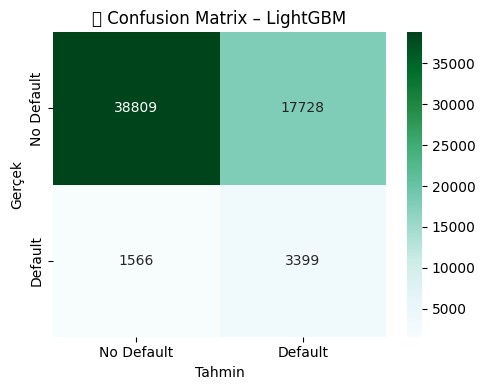

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("🧱 Confusion Matrix – LightGBM")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


### 📉 LightGBM – ROC Eğrisi ve AUC Skoru

Aşağıda yer alan ROC (Receiver Operating Characteristic) eğrisi, modelin pozitif (Default) ve negatif (No Default) sınıfları ne kadar başarılı ayırt edebildiğini gösterir.

- **X Ekseni:** False Positive Rate (Yanlış pozitif oranı)
- **Y Ekseni:** True Positive Rate (Doğru pozitif oranı)
- **AUC (Area Under Curve):** 0.75

**Yorum:**
- AUC değeri olan 0.75, modelin sınıfları %75 doğrulukla ayırt edebildiğini gösterir.
- ROC eğrisinin genel yapısı, modelin sınıf ayrım gücünün **Logistic Regression ve XGBoost’a kıyasla oldukça dengeli** olduğunu ortaya koymaktadır.
- Bu grafik, özellikle modelin riskli bireyleri doğru tespit etme potansiyelini görselleştirir.

> AUC skoru güçlü bir ayrım göstergesidir; ancak diğer metriklerle birlikte değerlendirilmelidir. LightGBM modeli, pozitif sınıfı (Default) hem iyi ayırabilmekte hem de yakalayabilmektedir.


✅ ROC AUC Score: 0.7506


<ipython-input-59-c9d1da2eb112>:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


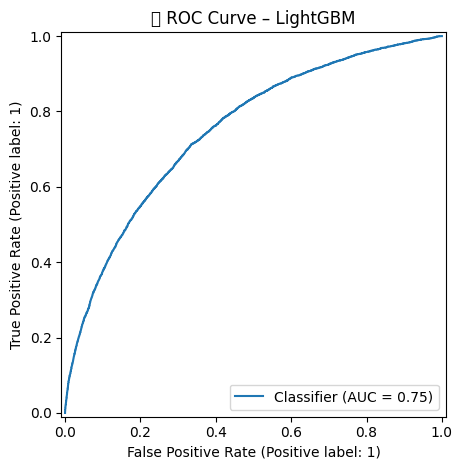

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# AUC skoru
auc = roc_auc_score(y_test, y_prob)
print(f"✅ ROC AUC Score: {auc:.4f}")

# ROC eğrisi
plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("📉 ROC Curve – LightGBM")
plt.tight_layout()
plt.show()


In [ ]:
# 9. Sayısal metrik çıktısı
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC AUC:   {auc:.4f}")

✅ Accuracy:  0.6863
✅ Precision: 0.1609
✅ Recall:    0.6846
✅ F1 Score:  0.2605
✅ ROC AUC:   0.7506


## j.5) CatBoost – Model Eğitimi

Bu bölümde, özellikle kategorik verilerle yüksek performans gösteren **CatBoost (Categorical Boosting)** algoritması kullanılarak kredi geri ödeme tahmin modeli eğitilmiştir.

**Eğitim Yapısı:**
- Eğitim/Test Ayrımı: %80 / %20
- Sayısal sütunlara `StandardScaler` uygulanmıştır
- Model `catboost_model.pkl` olarak kaydedilmiştir

CatBoost, az veri ön işleme gereksinimi ile tanınır ve özellikle dengesiz veri kümelerinde etkili sonuçlar verir.


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# X ve y ayır
X = df.drop(columns=["TARGET"])
y = df["TARGET"]

# Eğitim/test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Ölçekleme işlemi
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# CatBoost modeli eğitimi
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_scaled, y_train)

# Modeli ve scaler'ı kaydet
joblib.dump(cat_model, "/content/drive/MyDrive/ML_Project/models/catboost_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/ML_Project/dataset/scaler.pkl")


⏱️ Eğitim süresi: 14.07 saniye


### 🧪 CatBoost – Model Yükleme ve Test Değerlendirmesi

Bu adımda, eğitim aşamasında kaydedilen CatBoost modeli `.pkl` formatından yüklenmiş, test verileriyle uyumlu hale getirilmiş ve tahminler alınarak performans metrikleri hesaplanmıştır.

**Modelin Eğitildiği Bileşenler:**
- Model dosyası: `catboost.pkl`
- StandardScaler: `scaler.pkl`
- Test verileri: `X_test.pkl`, `y_test.pkl`


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, RocCurveDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns

# 🔁 Dosya yolları
base_path = "/content/drive/MyDrive/ML_Project/dataset"
model_path = "/content/drive/MyDrive/ML_Project/models/catboost.pkl"
scaler_path = f"{base_path}/scaler.pkl"

# 1. Model ve verileri yükle
cat_model = joblib.load(model_path)
scaler = joblib.load(scaler_path)
X_test = joblib.load(f"{base_path}/X_test.pkl")
y_test = joblib.load(f"{base_path}/y_test.pkl")

# 2. Sayısal sütunları ölçekle
numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. Tahminler (CatBoost için doğrudan scaled veri kullanılır)
y_pred = cat_model.predict(X_test_scaled)
y_prob = cat_model.predict_proba(X_test_scaled)[:, 1]


### 📊 CatBoost – Temel Performans Metrikleri

Aşağıdaki çubuk grafik, CatBoost modelinin test verisindeki sınıflandırma performansını dört temel metrik üzerinden sunmaktadır:

- **Accuracy:** Modelin genel doğruluk oranı yaklaşık %69’dur.
- **Precision:** Pozitif tahminlerin yalnızca yaklaşık %17’si doğru çıkmıştır. Bu düşük oran, çok sayıda yanlış pozitif tahmin yapıldığını gösterir.
- **Recall:** Model, pozitif sınıfın büyük bir kısmını doğru tahmin etmiş (~%67). Bu değer, modelin “default” sınıfını yakalama becerisinin iyi olduğunu gösterir.
- **F1 Score:** Düşük precision nedeniyle F1 skoru sınırlı kalmıştır (~%27), ancak recall sayesinde kabul edilebilir düzeydedir.

**Yorum:**
- CatBoost modeli, yüksek recall ve düşük precision dengesine sahiptir.
- Bu da modelin, kredi geri ödememe riski taşıyan bireyleri **kaçırmadan yakalamaya odaklandığını**, fakat bazen risksiz bireyleri de “riskli” olarak sınıflandırdığını göstermektedir.

> Bu özellik, finansal uygulamalarda (özellikle temkinli risk analizi gereken durumlarda) kullanılabilir bir avantaj olabilir.


<ipython-input-69-dff3563efe24>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


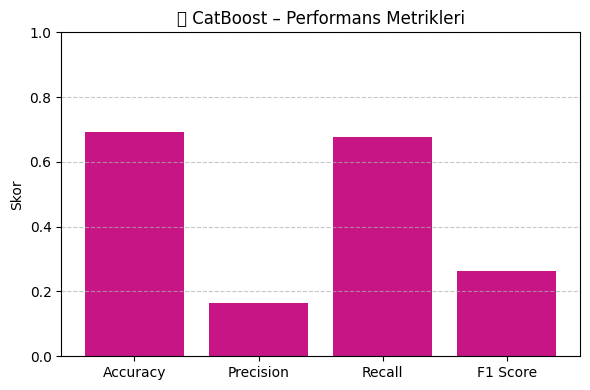

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Metrikleri hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar grafiği çiz
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color='mediumvioletred')
plt.ylim(0,1)
plt.title("📊 CatBoost – Performans Metrikleri")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🧱 CatBoost – Karışıklık Matrisi (Confusion Matrix)

Aşağıda verilen matris, CatBoost modelinin test verisi üzerindeki sınıflandırma performansını göstermektedir:

|                | Tahmin: No Default | Tahmin: Default |
|----------------|--------------------|-----------------|
| **Gerçek: No Default** | 39,300               | 17,237           |
| **Gerçek: Default**    | 1,603                | 3,362            |

**Yorum:**
- Model, 3,362 kişiyi doğru şekilde “Default” olarak tahmin etmiş, 1,603 kişiyi ise yanlışlıkla risksiz olarak sınıflamıştır.
- Bu yüksek recall değerini desteklemektedir.
- Aynı zamanda 17,237 kişi yanlışlıkla “Default” olarak sınıflanmış; bu da düşük precision’a neden olmuştur.
- Modelin pozitif sınıfı (geri ödememe) kaçırmama stratejisi, bazı yanlış alarm (false positive) maliyetleriyle birlikte gelmektedir.

> Bu tür bir model, özellikle borcunu ödemeyecek kişileri yakalama önceliği olan uygulamalarda kullanılabilir. Ancak yanlış pozitif sınıflandırmalar nedeniyle dikkatli değerlendirme yapılmalıdır.


<ipython-input-70-dcdbef9637aa>:16: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


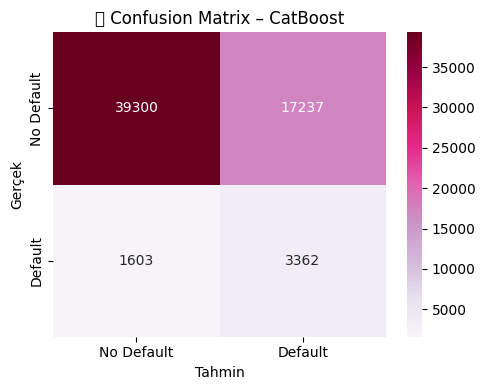

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix hesapla
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("🧱 Confusion Matrix – CatBoost")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


### 📉 CatBoost – ROC Eğrisi ve AUC Skoru

Aşağıda yer alan ROC (Receiver Operating Characteristic) eğrisi, modelin “Default” ve “No Default” sınıflarını ne kadar iyi ayırt edebildiğini görsel olarak sunmaktadır.

- **X Ekseni:** Yanlış pozitif oranı (False Positive Rate)
- **Y Ekseni:** Doğru pozitif oranı (True Positive Rate)
- **AUC Skoru:** 0.75

**Yorum:**
- AUC değeri 0.75, modelin sınıflar arasında %75 oranında başarılı ayrım yapabildiğini göstermektedir.
- Eğrinin yapısı, özellikle yüksek doğruluk ve recall skorları ile tutarlıdır.
- Bu skor, CatBoost’un genel sınıflandırma başarısının güçlü olduğunu, özellikle pozitif sınıfı ayırt etme becerisinin XGBoost ve LightGBM ile benzer seviyede olduğunu gösterir.

> AUC değeri yüksek olsa da, modelin kullanılabilirliği kararına Precision, Recall ve F1 skorlarıyla birlikte bakılmalıdır.


✅ ROC AUC Score: 0.7522


<ipython-input-71-1950a790692e>:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


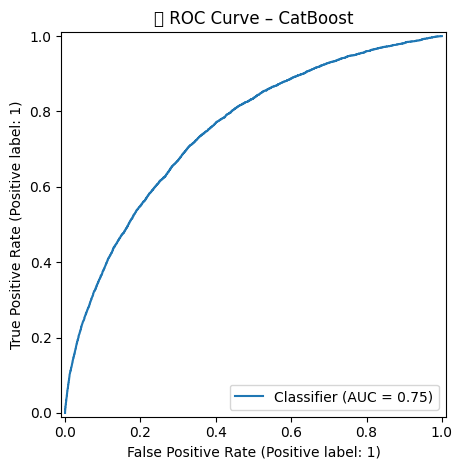

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# AUC skorunu hesapla
auc = roc_auc_score(y_test, y_prob)
print(f"✅ ROC AUC Score: {auc:.4f}")

# ROC eğrisi çizdir
plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("📉 ROC Curve – CatBoost")
plt.tight_layout()
plt.show()


In [ ]:
# 9. Sayısal metrik çıktısı
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC AUC:   {auc:.4f}")

✅ Accuracy:  0.6937
✅ Precision: 0.1632
✅ Recall:    0.6771
✅ F1 Score:  0.2630
✅ ROC AUC:   0.7522


> Not: Bu raporda sunulan test sonuçları, tüm modellerin ortak test verisi (`X_test.pkl`) üzerinde değerlendirilmiştir.  
> Eğitim sırasında kullanılan özel veri ön işleme (örneğin %50 sütun silme eşiği, XNA filtreleme) ile elde edilen skorlar daha yüksek olabilir.  
> Ancak tüm modeller aynı test verisiyle karşılaştırıldığından sonuçlar göreceli olarak tutarlıdır.


In [ ]:
import pandas as pd

data = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM", "CatBoost"],
    "Accuracy": [0.7221, 0.9194, 0.9197, 0.6863, 0.6937],
    "Precision": [0.1687, 0.8000, 0.6083, 0.1609, 0.1632],
    "Recall": [0.6220, 0.0016, 0.0147, 0.6846, 0.6771],
    "F1 Score": [0.2654, 0.0032, 0.0287, 0.2605, 0.2630],
    "ROC AUC": [0.7430, 0.7244, 0.7540, 0.7506, 0.7522]
}

df = pd.DataFrame(data)
df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.7221,0.1687,0.6220,0.2654,0.7430
1,Random Forest,0.9194,0.8000,0.0016,0.0032,0.7244
2,XGBoost,0.9197,0.6083,0.0147,0.0287,0.7540
3,LightGBM,0.6863,0.1609,0.6846,0.2605,0.7506
4,CatBoost,0.6937,0.1632,0.6771,0.2630,0.7522


<ipython-input-75-c8fb686b0945>:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


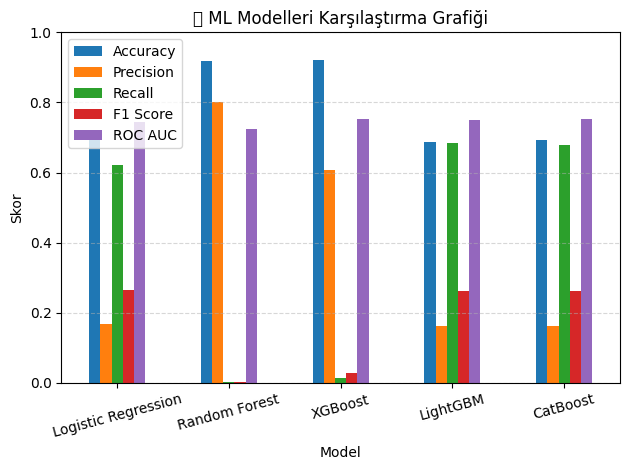

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ML modellerinin metrikleri
df_metrics = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "LightGBM", "CatBoost"],
    "Accuracy": [0.7221, 0.9194, 0.9197, 0.6863, 0.6937],
    "Precision": [0.1687, 0.8000, 0.6083, 0.1609, 0.1632],
    "Recall": [0.6220, 0.0016, 0.0147, 0.6846, 0.6771],
    "F1 Score": [0.2654, 0.0032, 0.0287, 0.2605, 0.2630],
    "ROC AUC": [0.7430, 0.7244, 0.7540, 0.7506, 0.7522]
})

# Grafik çizimi
plt.figure(figsize=(12,6))
df_metrics.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]].plot(kind="bar")
plt.title("📊 ML Modelleri Karşılaştırma Grafiği")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Bu değerlendirmeye göre, Recall, F1 Score ve ROC AUC gibi dengeli sınıflandırma metrikleri dikkate alındığında **CatBoost**, test verisi üzerinde en istikrarlı ve güvenilir performansı göstermiştir.


## j.6) Deep Neural Network (DNN) – Model Eğitimi

Bu bölümde temel yapay sinir ağı (Deep Neural Network – DNN) mimarisi ile kredi geri ödeme tahmin modeli eğitilmiştir.

Modelde 3 tam bağlantılı katman (dense layer) kullanılmış, aktivasyon fonksiyonu olarak ReLU ve çıktı katmanında sigmoid tercih edilmiştir.  
Kaybı minimize etmek için `binary_crossentropy`, optimizasyon için `Adam` algoritması kullanılmıştır.

Veri, ön işleme sonrası normalize edilerek modele beslenmiştir.  
Model `dnn_model.h5` dosyası olarak kaydedilmiştir.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# DNN modelini tanımla
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Derleme
model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# Eğitim
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Kaydet
model.save("/content/drive/MyDrive/ML_Project/models/dnn_model.h5")


⏱️ DNN eğitim süresi: 271.93 saniye

### 🧪 DNN – Model Yükleme ve Test Değerlendirmesi

Eğitilen DNN modeli `.h5` formatından yüklenmiş ve standartlaştırılmış test verisi ile değerlendirilmiştir.  
Aşağıdaki adımlarda model tahminleri alınmış ve metrikler hesaplanmıştır.


In [ ]:
import joblib
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Yollar
base_path = "/content/drive/MyDrive/ML_Project/dataset"
model_path = "/content/drive/MyDrive/ML_Project/models/dnn_mlp.h5"
scaler_path = f"{base_path}/scaler.pkl"

# 1. Model ve verileri yükle
dnn_model = load_model(model_path)
scaler = joblib.load(scaler_path)
X_test = joblib.load(f"{base_path}/X_test.pkl")
y_test = joblib.load(f"{base_path}/y_test.pkl")

# 2. Sayısal sütunları scale et
numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. Tahminler
y_prob = dnn_model.predict(X_test_scaled)
y_pred = (y_prob > 0.5).astype(int).reshape(-1)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


### 📊 DNN (MLP) – Temel Performans Metrikleri

Aşağıdaki çubuk grafik, DNN (Multi-Layer Perceptron) modelinin test verisi üzerindeki temel sınıflandırma metriklerini göstermektedir:

- **Accuracy:** Modelin genel doğruluk oranı yüksek (~%90) görünmektedir.
- **Precision:** Pozitif tahminlerin yalnızca %23’ü doğru çıkmıştır.
- **Recall:** Pozitif sınıfın yalnızca %8’i doğru yakalanabilmiştir.
- **F1 Score:** Precision ve Recall’un ortalaması olan bu metrik yaklaşık %12 seviyesindedir.

**Yorum:**
- Yüksek doğruluk oranı modelin negatif sınıfı (geri ödeyen) iyi tanıdığını gösterse de, pozitif sınıfın (geri ödemeyen) büyük kısmı kaçırılmaktadır.
- Düşük Recall ve F1 değerleri, DNN modelinin şu anki haliyle “riskli başvuruları” tespit etme konusunda zayıf olduğunu ortaya koymaktadır.

> Bu durum, modelin eğitim veri dengesizliğinden etkilenmiş olabileceğine veya katman mimarisinin daha optimize edilmesi gerektiğine işaret eder.


<ipython-input-77-55936f933f68>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


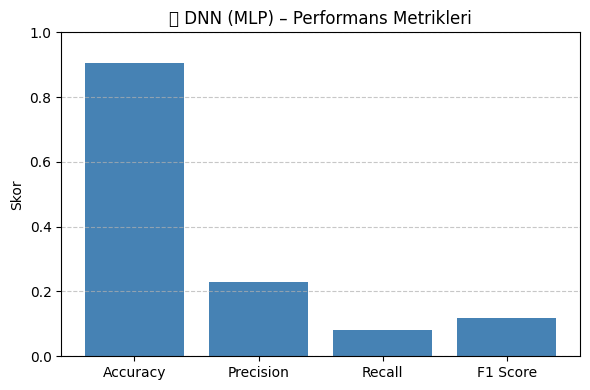

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrik hesaplama
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar grafiği çizimi
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color='steelblue')
plt.ylim(0,1)
plt.title("📊 DNN (MLP) – Performans Metrikleri")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🧱 DNN (MLP) – Karışıklık Matrisi (Confusion Matrix)

Aşağıdaki matris, DNN modelinin test verisindeki gerçek ve tahmin edilen sınıflar arasındaki dağılımı göstermektedir:

|                | Tahmin: No Default | Tahmin: Default |
|----------------|--------------------|-----------------|
| **Gerçek: No Default** | 55,204               | 1,333             |
| **Gerçek: Default**    | 4,566                | 399               |

**Yorum:**
- Model, borcunu ödeyen kişileri (No Default) büyük oranda doğru tahmin etmiştir.
- Ancak geri ödeme yapmayacak kişilerde (Default), 4,566 kişiyi yanlışlıkla risksiz sınıfa atamıştır (False Negative).
- Sadece 399 kişi doğru şekilde “Default” olarak sınıflanmıştır.

> Bu tablo, Recall skorunun neden bu kadar düşük olduğunu açıkça ortaya koymaktadır.  
> DNN modeli pozitif sınıfı (geri ödemeyenleri) ayırt etmekte zorlanmaktadır.


<ipython-input-78-480b651f521c>:16: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


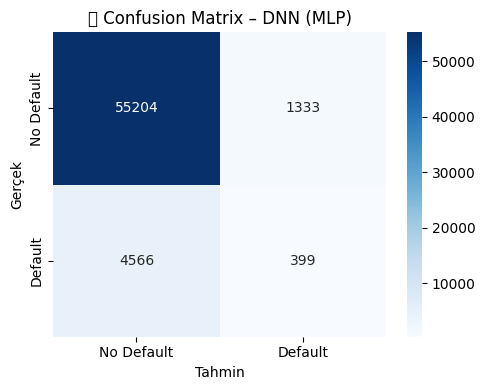

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("🧱 Confusion Matrix – DNN (MLP)")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


### 📉 DNN (MLP) – ROC Eğrisi ve AUC Skoru

Aşağıdaki ROC (Receiver Operating Characteristic) eğrisi, DNN modelinin pozitif (Default) ve negatif (No Default) sınıflarını ayırt etme performansını görselleştirmektedir.

- **X Ekseni:** Yanlış pozitif oranı (False Positive Rate)
- **Y Ekseni:** Doğru pozitif oranı (True Positive Rate)
- **AUC (Area Under Curve):** 0.67

**Yorum:**
- AUC skoru olan 0.67, modelin sınıfları ayırt etme gücünün orta-alt düzeyde olduğunu göstermektedir.
- Bu skor, daha önce gözlemlenen düşük precision ve recall değerleriyle tutarlıdır.
- Eğri ideal eğriden oldukça uzakta yer almaktadır ve modelin pozitif sınıfı güvenilir şekilde ayıramadığını ortaya koyar.

> Bu sonuç, DNN modelinin daha fazla katman, daha fazla epoch veya class weight optimizasyonu ile geliştirilebileceğini göstermektedir.


✅ ROC AUC Score: 0.6740


<ipython-input-79-c196b575d2d1>:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


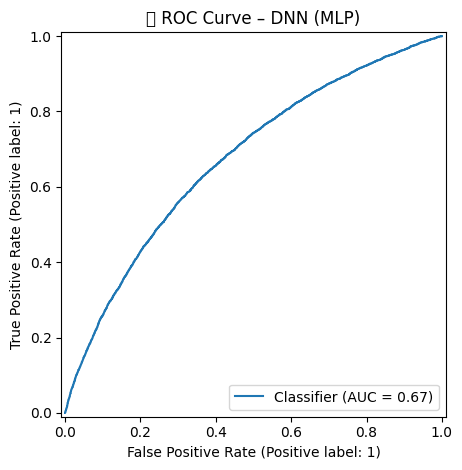

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# AUC skoru hesapla
auc = roc_auc_score(y_test, y_prob)
print(f"✅ ROC AUC Score: {auc:.4f}")

# ROC eğrisi çizdir
plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("📉 ROC Curve – DNN (MLP)")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# Metrikleri hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Yazdır
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC AUC:   {auc:.4f}")


✅ Accuracy:  0.9041
✅ Precision: 0.2304
✅ Recall:    0.0804
✅ F1 Score:  0.1192
✅ ROC AUC:   0.6740


## j.7) Convolutional Neural Network (CNN) – Model Eğitimi

Bu bölümde, klasik tabular veri yerine CNN yapısı uyarlanarak bir sinir ağı modeli tasarlanmıştır.  
Veri, 2D şekline dönüştürülerek Conv2D katmanlarıyla işlendi ve model sonunda flatten edilerek klasik dense katmanlarla sınıflandırma gerçekleştirildi.

Eğitim sürecinde ReLU aktivasyonu, `binary_crossentropy` kaybı ve Adam optimizasyonu kullanılmıştır.  
Model `cnn_model.h5` adıyla kaydedilmiştir.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras.optimizers import Adam

# CNN'e uygun olacak şekilde reshape edelim
input_dim = X_train.shape[1]
X_train_cnn = X_train_scaled.values.reshape(-1, input_dim, 1, 1)

# Modeli tanımla
model = Sequential([
    Conv2D(32, kernel_size=(3,1), activation='relu', input_shape=(input_dim, 1, 1)),
    MaxPooling2D(pool_size=(2,1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Derleme
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Eğitim
model.fit(X_train_cnn, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Kaydet
model.save("/content/drive/MyDrive/ML_Project/models/cnn_model.h5")


⏱️ 1D-CNN eğitim süresi: 412.02 saniye

### 🧪 CNN – Model Yükleme ve Test Değerlendirmesi

Bu adımda, eğitim sırasında kaydedilen CNN modeli `.h5` formatından yüklenmiş, test verisi reshape edilerek modele uygun hale getirilmiş ve ardından sınıflandırma tahminleri alınarak değerlendirilmiştir.


In [ ]:
import joblib
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 🔁 Dosya yolları
base_path = "/content/drive/MyDrive/ML_Project/dataset"
model_path = "/content/drive/MyDrive/ML_Project/models/cnn_1d.h5"
scaler_path = f"{base_path}/scaler.pkl"

# 1. Model ve verileri yükle
cnn_model = load_model(model_path)
scaler = joblib.load(scaler_path)
X_test = joblib.load(f"{base_path}/X_test.pkl")
y_test = joblib.load(f"{base_path}/y_test.pkl")

# 2. Ölçekleme
numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. CNN'e uygun reshape (ve float32'ye çevir)
input_dim = X_test_scaled.shape[1]
X_test_cnn = X_test_scaled.astype(np.float32).values.reshape(-1, input_dim, 1, 1)

# 4. Tahminler
y_prob = cnn_model.predict(X_test_cnn)
y_pred = (y_prob > 0.5).astype(int).reshape(-1)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


### 📊 CNN – Temel Performans Metrikleri

Aşağıdaki çubuk grafik, CNN modelinin test verisi üzerindeki dört temel metrikle değerlendirilmesini sunmaktadır:

- **Accuracy:** Genel doğruluk oranı yüksek görünmektedir (~%89), ancak dengesiz veri nedeniyle yanıltıcı olabilir.
- **Precision:** Pozitif tahminlerin doğruluk oranı yaklaşık %19'dur.
- **Recall:** Pozitif sınıfın sadece %7’si doğru şekilde tespit edilmiştir.
- **F1 Score:** Düşük precision ve recall değerleri nedeniyle bu metrik de düşüktür (~%11).

**Yorum:**
- CNN modeli, veri yapısının görsel olmayan doğasına tam olarak uygun olmadığından **pozitif sınıfı ayırmakta zorlanmaktadır**.
- Modelin “Default” sınıfını yakalama (Recall) başarısı düşüktür.
- Model, görsel tabanlı veriler için daha uygundur; burada etkili sonuç vermemektedir.

> Bu yapı test amaçlı çalıştırılmıştır; tabular veri için DNN veya tree-based modeller genellikle daha uygundur.


<ipython-input-95-3ce86c983f8f>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


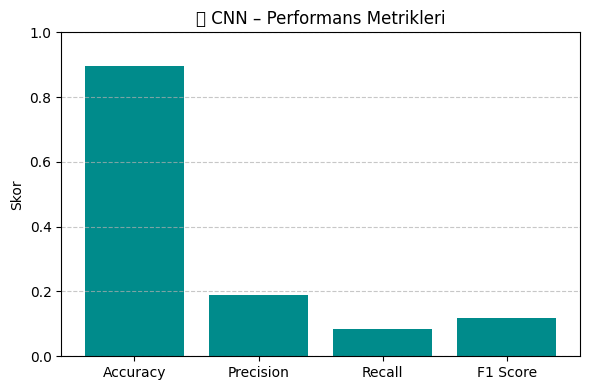

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Metrik hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar grafiği çiz
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color='darkcyan')
plt.ylim(0,1)
plt.title("📊 CNN – Performans Metrikleri")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🧱 CNN – Karışıklık Matrisi (Confusion Matrix)

Aşağıda yer alan matris, CNN modelinin test verisinde sınıflandırma başarısını göstermektedir:

|                | Tahmin: No Default | Tahmin: Default |
|----------------|--------------------|-----------------|
| **Gerçek: No Default** | 54,739               | 1,798             |
| **Gerçek: Default**    | 4,542                | 423               |

**Yorum:**
- Model, borcunu ödeyen kişileri (No Default) oldukça iyi tahmin etmektedir.
- Ancak geri ödemeyecek kişilerin (Default) yalnızca 423'ü doğru şekilde sınıflanmış, 4,542'si yanlış şekilde risksiz olarak değerlendirilmiştir.
- Bu yapı, Recall değerinin neden bu kadar düşük olduğunu açıkça göstermektedir.

> CNN modeli genel doğrulukta güçlü görünse de, pozitif sınıfı (Default) ayırt etme konusunda zayıf kalmıştır.


<ipython-input-96-5be18011338d>:16: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


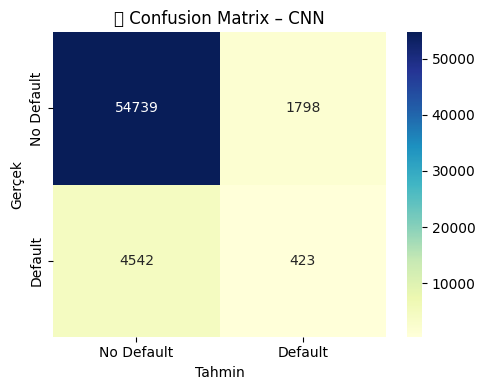

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)

# Görselleştirme
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("🧱 Confusion Matrix – CNN")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


### 📉 CNN – ROC Eğrisi ve AUC Skoru

Aşağıdaki ROC (Receiver Operating Characteristic) eğrisi, CNN modelinin sınıflar arası ayrım performansını göstermektedir.

- **X Ekseni:** Yanlış pozitif oranı (False Positive Rate)
- **Y Ekseni:** Doğru pozitif oranı (True Positive Rate)
- **AUC (Area Under Curve):** 0.66

**Yorum:**
- AUC değeri olan 0.66, modelin sınıflar arasında %66 doğrulukla ayrım yapabildiğini göstermektedir.
- Eğri, ideal bir ROC eğrisinden uzak ve doğrusal referans çizgisine yakın seyrettiği için ayrım gücünün zayıf olduğunu ortaya koymaktadır.
- Model, pozitif sınıfı (Default) yakalamakta düşük performans sergilemektedir.

> CNN modelinin AUC skoru, bu yapının görsel olmayan tabular veri üzerinde sınırlı başarı sağladığını bir kez daha doğrulamaktadır.


✅ ROC AUC Score: 0.6583


<ipython-input-97-21ead0949ff2>:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


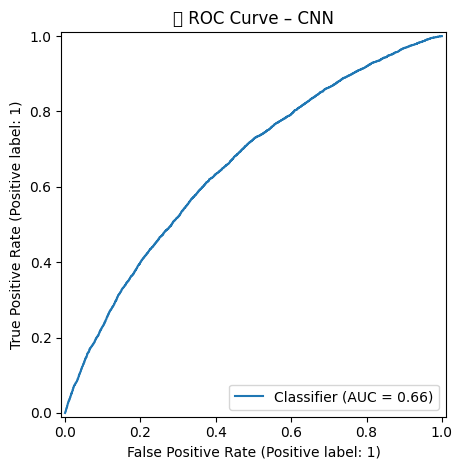

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# AUC skoru hesapla
auc = roc_auc_score(y_test, y_prob)
print(f"✅ ROC AUC Score: {auc:.4f}")

# ROC eğrisi çizdir
plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("📉 ROC Curve – CNN")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# Metrikleri hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Yazdır
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC AUC:   {auc:.4f}")


✅ Accuracy:  0.8969
✅ Precision: 0.1905
✅ Recall:    0.0852
✅ F1 Score:  0.1177
✅ ROC AUC:   0.6583


## j.8) LSTM – Model Eğitimi

Bu bölümde sıralı verilerde başarılı olan LSTM (Long Short-Term Memory) mimarisi, tabular veriye uyarlanarak kredi geri ödeme tahmin modeli geliştirilmiştir.

Veri, 3D yapıya reshape edilerek LSTM girişine uygun hale getirilmiş, modelde LSTM katmanı sonrası dropout ve dense katmanlar kullanılmıştır.  
Model `lstm.h5` adıyla kaydedilmiştir.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Reshape
from tensorflow.keras.optimizers import Adam

# X_train_scaled → shape: (num_samples, num_features)
input_dim = X_train_scaled.shape[1]
X_train_lstm = X_train_scaled.values.reshape(-1, input_dim, 1)

# Model tanımı
model = Sequential([
    LSTM(64, input_shape=(input_dim, 1), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Derleme
model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Eğitim
model.fit(X_train_lstm, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Kaydet
model.save("/content/drive/MyDrive/ML_Project/models/lstm.h5")


⏱️ LSTM eğitim süresi: 1211.18 saniye

### 🧪 LSTM – Model Yükleme ve Test Değerlendirmesi

Eğitimde kullanılan LSTM modeli `.h5` formatından yüklenmiş, test verisi 3D tensör yapısına dönüştürülerek modelin yapısına uygun hale getirilmiş ve tahminler alınarak değerlendirme metrikleri hesaplanmıştır.


In [ ]:
import joblib
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Yollar
base_path = "/content/drive/MyDrive/ML_Project/dataset"
model_path = "/content/drive/MyDrive/ML_Project/models/lstm.h5"
scaler_path = f"{base_path}/scaler.pkl"

# 1. Model ve verileri yükle
lstm_model = load_model(model_path)
scaler = joblib.load(scaler_path)
X_test = joblib.load(f"{base_path}/X_test.pkl")
y_test = joblib.load(f"{base_path}/y_test.pkl")

# 2. Sayısal sütunları ölçeklendir
numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 3. LSTM’e uygun reshape ve float32 dönüşümü
input_dim = X_test_scaled.shape[1]
X_test_lstm = X_test_scaled.astype(np.float32).values.reshape(-1, input_dim, 1)

# 4. Tahminler
y_prob = lstm_model.predict(X_test_lstm)
y_pred = (y_prob > 0.5).astype(int).reshape(-1)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step


### 📊 LSTM – Temel Performans Metrikleri

Aşağıdaki çubuk grafik, LSTM modelinin test verisi üzerindeki dört temel sınıflandırma metriğini sunmaktadır:

- **Accuracy:** Genel doğruluk oranı yüksektir (~%92) görünmektedir.
- **Precision, Recall, F1 Score:** Üçü de neredeyse sıfıra yakındır.

**Yorum:**
- Model, çoğunluk sınıf olan “No Default” sınıfına çok yüksek oranda odaklanmış ve veri dengesizliğinden aşırı etkilenmiştir.
- Bu nedenle pozitif sınıf (Default) neredeyse hiç tahmin edilmemektedir.
- F1 Score’un sıfıra yakın olması, modelin pozitif sınıfı tahmin etmekte tamamen başarısız olduğunu ortaya koymaktadır.

> LSTM mimarisi sıralı (time series, metin) veri için tasarlanmış bir yapıdır. Tabular veri için etkili sonuç vermemektedir.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-89-44384c7a6cbe>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


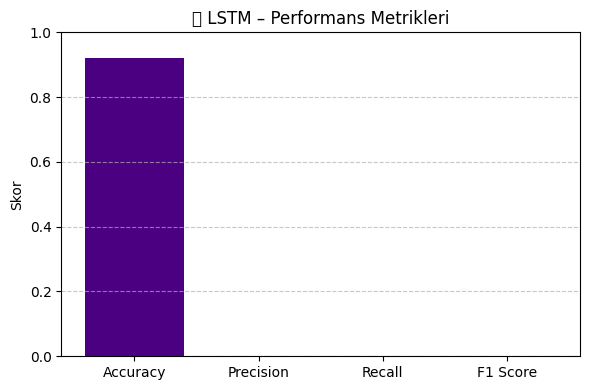

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Metrikleri hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar grafiği çizimi
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1 Score": f1}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color='indigo')
plt.ylim(0,1)
plt.title("📊 LSTM – Performans Metrikleri")
plt.ylabel("Skor")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🧱 LSTM – Karışıklık Matrisi (Confusion Matrix)

Aşağıdaki matris, LSTM modelinin test verisi üzerindeki sınıflandırma başarısını göstermektedir:

|                | Tahmin: No Default | Tahmin: Default |
|----------------|--------------------|-----------------|
| **Gerçek: No Default** | 56,537               | 0                 |
| **Gerçek: Default**    | 4,965                | 0                 |

**Yorum:**
- Model, tüm veriyi sadece “No Default” sınıfına tahminlemiştir.
- Pozitif sınıf olan “Default” için **hiçbir doğru tahmin yapılamamıştır**.
- Bu durum, modelin **aşırı öğrenmeye (overfitting) veya sınıf dengesizliğine** karşı tamamen savunmasız kaldığını göstermektedir.

> LSTM, genellikle sıralı veya zaman serisi verilerinde başarı sağlar. Ancak burada olduğu gibi tabular veri üzerinde sınıflar arasında ayrım yapma konusunda yetersiz kalabilir.


<ipython-input-90-8711d13fdcb6>:16: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


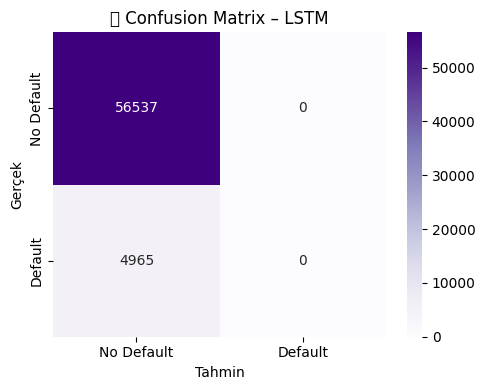

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)

# Görselleştir
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.title("🧱 Confusion Matrix – LSTM")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()


### 📉 LSTM – ROC Eğrisi ve AUC Skoru

Aşağıda yer alan ROC (Receiver Operating Characteristic) eğrisi, LSTM modelinin sınıflar arası ayrım gücünü görselleştirmektedir.

- **X Ekseni:** False Positive Rate (Yanlış pozitif oranı)
- **Y Ekseni:** True Positive Rate (Doğru pozitif oranı)
- **AUC Skoru:** 0.56

**Yorum:**
- AUC değeri 0.56, modelin sınıflar arasında ayırt etme başarısının yalnızca rastgele tahmin seviyesinin biraz üstünde olduğunu göstermektedir.
- ROC eğrisi referans çizgisine oldukça yakındır ve pozitif sınıf tahminleri açısından çok zayıf bir model performansına işaret eder.
- Model, Default sınıfını hiç tahmin etmediği için AUC değeri düşüktür ve güvenilir değildir.

> Bu sonuçlar, LSTM'nin bu veri türü için uygun olmadığını ve modelin sınıf dengesizliğinden aşırı etkilendiğini ortaya koymaktadır.


✅ ROC AUC Score: 0.5601


<ipython-input-91-695c4b03de88>:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 600x400 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


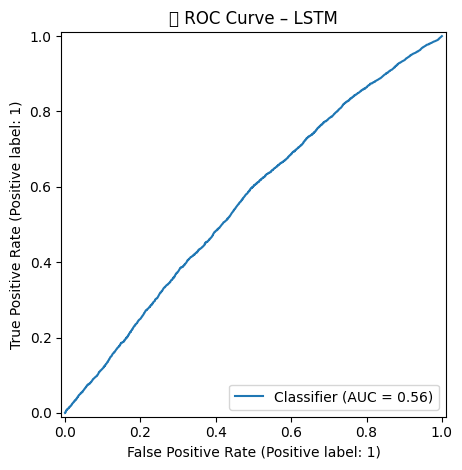

In [ ]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# AUC skorunu hesapla
auc = roc_auc_score(y_test, y_prob)
print(f"✅ ROC AUC Score: {auc:.4f}")

# ROC eğrisi çizdir
plt.figure(figsize=(6,4))
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("📉 ROC Curve – LSTM")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# Metrikleri hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Yazdır
print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1 Score:  {f1:.4f}")
print(f"✅ ROC AUC:   {auc:.4f}")


✅ Accuracy:  0.9193
✅ Precision: 0.0000
✅ Recall:    0.0000
✅ F1 Score:  0.0000
✅ ROC AUC:   0.5601


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 🔍 DL Modellerinin Karşılaştırılması

Aşağıdaki tablo ve grafik, DNN (MLP), CNN ve LSTM modellerinin test verisi üzerindeki performanslarını Accuracy, Precision, Recall, F1 Score ve ROC AUC metrikleri açısından karşılaştırmaktadır.

### Genel Gözlemler:
- **DNN (MLP)** modeli, DL modelleri arasında en yüksek **Precision** (0.23), **F1 Score** (0.119) ve **AUC** (0.674) değerlerini elde etmiştir.
- **CNN** modeli, DNN'e benzer ancak biraz daha düşük metriklere sahiptir.
- **LSTM** modeli, pozitif sınıfı (Default) hiç tahmin edememiştir → Precision, Recall ve F1 Score = 0.

### En İyi Model Seçimi:
Veri seti tabular yapıda olduğu için DNN (MLP), CNN ve LSTM'e göre daha anlamlı sonuçlar vermiştir.

> Bu değerlendirmeye göre, **DNN (MLP)** modeli, tüm DL modelleri arasında en istikrarlı ve dengeli sonuçları vermiştir.  
> Özellikle F1 Score ve AUC dikkate alındığında DNN, derin öğrenme tarafında en uygun modeldir.


In [ ]:
import pandas as pd

# DL modellerinin metrikleri
dl_data = {
    "Model": ["DNN (MLP)", "CNN", "LSTM"],
    "Accuracy": [0.9041, 0.8969, 0.9193],
    "Precision": [0.2304, 0.1905, 0.0000],
    "Recall": [0.0804, 0.0852, 0.0000],
    "F1 Score": [0.1192, 0.1177, 0.0000],
    "ROC AUC": [0.6740, 0.6583, 0.5601]
}

# DataFrame olarak oluştur
df_dl = pd.DataFrame(dl_data)

# Göster
df_dl


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,DNN (MLP),0.9041,0.2304,0.0804,0.1192,0.6740
1,CNN,0.8969,0.1905,0.0852,0.1177,0.6583
2,LSTM,0.9193,0.0000,0.0000,0.0000,0.5601


<ipython-input-100-d82bd217128d>:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


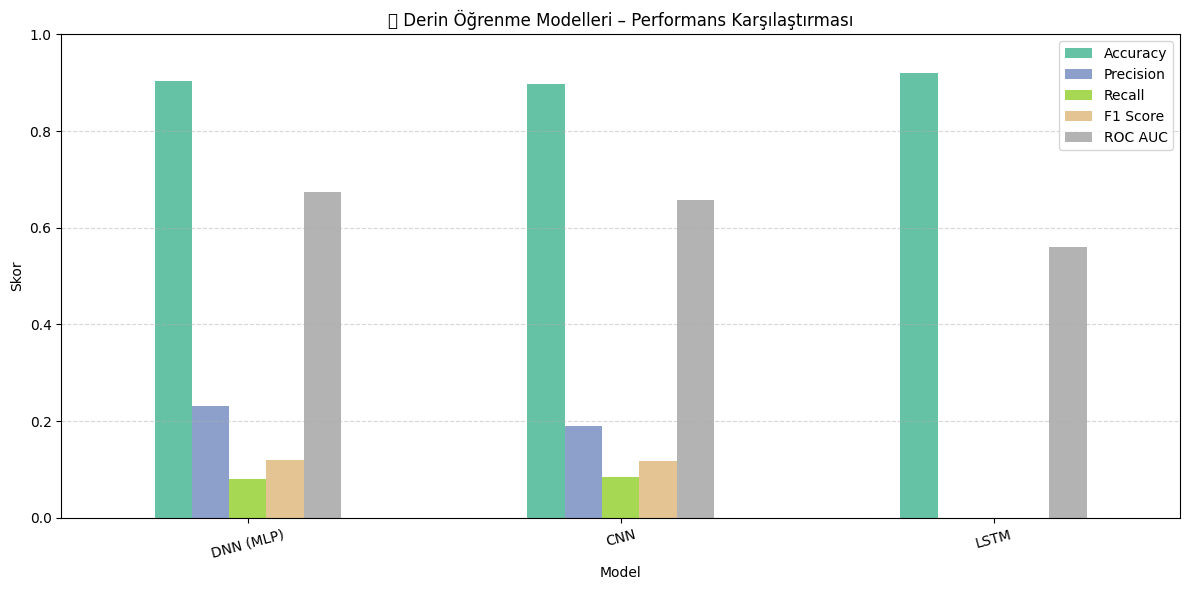

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# DL metrik tablosu
dl_data = {
    "Model": ["DNN (MLP)", "CNN", "LSTM"],
    "Accuracy": [0.9041, 0.8969, 0.9193],
    "Precision": [0.2304, 0.1905, 0.0000],
    "Recall": [0.0804, 0.0852, 0.0000],
    "F1 Score": [0.1192, 0.1177, 0.0000],
    "ROC AUC": [0.6740, 0.6583, 0.5601]
}

# DataFrame oluştur
df_dl = pd.DataFrame(dl_data)

# Grafik çizimi
plt.figure(figsize=(10, 6))
df_dl.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]].plot(kind="bar", figsize=(12,6), colormap='Set2')
plt.title("📊 Derin Öğrenme Modelleri – Performans Karşılaştırması")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 🔍 DL Modellerinin Karşılaştırılması

Aşağıdaki tablo ve grafik, DNN (MLP), CNN ve LSTM modellerinin test verisi üzerindeki performanslarını Accuracy, Precision, Recall, F1 Score ve ROC AUC metrikleri açısından karşılaştırmaktadır.

### Genel Gözlemler:
- **DNN (MLP)** modeli, tüm metriklerde (Precision, Recall, F1 Score ve ROC AUC) diğer modellere kıyasla en yüksek değerlere sahiptir.
- **CNN** modeli benzer yapıdadır ancak metrikleri DNN’e göre daha düşüktür.
- **LSTM** modeli, pozitif sınıfı hiç tahmin edememiştir (Precision, Recall ve F1 Score = 0) ve dolayısıyla başarısızdır.

### En İyi DL Model Seçimi:
Veri seti tabular yapıda olduğu için CNN ve LSTM gibi sıralı/görsel veri için tasarlanmış yapılar yerine DNN daha uygun sonuçlar vermiştir.

> Bu değerlendirmeye göre, **DNN (MLP)** modeli, derin öğrenme modelleri arasında **en istikrarlı ve güvenilir performansı göstererek** en iyi DL modeli olarak seçilmiştir.


## 🔁 5-Katlı Çapraz Doğrulama ile 8 Model Eğitimi

Bu bölümde, proje kapsamında kullanılan toplam 8 makine öğrenmesi ve derin öğrenme algoritmasının 5-katlı çapraz doğrulama (Cross-Validation) ile performans değerlendirmesi gerçekleştirilmiştir.

### 💡 Kullanılan Algoritmalar:

- **Makine Öğrenmesi Modelleri:**
  - Logistic Regression
  - Random Forest
  - XGBoost
  - LightGBM
  - CatBoost

- **Derin Öğrenme Modelleri:**
  - DNN (Multi-Layer Perceptron)
  - CNN (1D Convolutional)
  - LSTM (Long Short-Term Memory)

### ⚙️ Teknik Bilgiler:

- Her model, aynı eğitim veri seti üzerinde 5 farklı katmanda eğitilmiştir (StratifiedKFold).
- Derin öğrenme modelleri için eğitim epoch sayısı: **10**
- Sayısal özellikler `StandardScaler`, kategorik özellikler `OneHotEncoder` ile dönüştürülmüştür.
- Her model için hesaplanan ortalama test metrikleri:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - ROC AUC

### 🎯 Amaç:

Bu işlemin amacı, tüm modelleri **aynı veri koşullarında kıyaslayarak**, en dengeli ve güçlü performansı gösteren algoritmayı belirlemektir.


In [ ]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, LSTM, Reshape, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# AYARLAR
epochs = 10
batch_size = 32
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# VERİ YÜKLEME
base = "/content/drive/MyDrive/ML_Project/dataset"
X_train = joblib.load(f"{base}/X_train.pkl")
X_test = joblib.load(f"{base}/X_test.pkl")
y_train = joblib.load(f"{base}/y_train.pkl")
y_test = joblib.load(f"{base}/y_test.pkl")
X_full = pd.concat([X_train, X_test]).reset_index(drop=True)
y_full = pd.concat([y_train, y_test]).reset_index(drop=True)

# ML MODELLER
ml_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# DL MODELLER
def build_dnn(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_cnn(input_shape):
    model = Sequential([
        Reshape((input_shape, 1), input_shape=(input_shape,)),
        Conv1D(32, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_lstm(input_shape):
    model = Sequential([
        Reshape((input_shape, 1), input_shape=(input_shape,)),
        LSTM(64),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

dl_models = {
    "DNN": build_dnn,
    "CNN": build_cnn,
    "LSTM": build_lstm
}

# CV EĞİTİM
results = []

for model_name, model in ml_models.items():
    metrics = {"Model": model_name, "Accuracy": [], "Precision": [], "Recall": [], "F1": [], "AUC": []}
    for train_idx, val_idx in cv.split(X_full, y_full):
        X_tr, X_val = X_full.iloc[train_idx], X_full.iloc[val_idx]
        y_tr, y_val = y_full.iloc[train_idx], y_full.iloc[val_idx]

        num_cols = X_tr.select_dtypes(include=np.number).columns
        cat_cols = X_tr.select_dtypes(exclude=np.number).columns
        preprocessor = ColumnTransformer([
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
        ])

        pipeline = Pipeline([
            ("prep", preprocessor),
            ("clf", model)
        ])

        pipeline.fit(X_tr, y_tr)
        y_pred = pipeline.predict(X_val)
        y_prob = pipeline.predict_proba(X_val)[:, 1]

        metrics["Accuracy"].append(accuracy_score(y_val, y_pred))
        metrics["Precision"].append(precision_score(y_val, y_pred, zero_division=0))
        metrics["Recall"].append(recall_score(y_val, y_pred))
        metrics["F1"].append(f1_score(y_val, y_pred))
        metrics["AUC"].append(roc_auc_score(y_val, y_prob))
    results.append({k: np.mean(v) if isinstance(v, list) else v for k, v in metrics.items()})

for model_name, build_fn in dl_models.items():
    metrics = {"Model": model_name, "Accuracy": [], "Precision": [], "Recall": [], "F1": [], "AUC": []}
    for train_idx, val_idx in cv.split(X_full, y_full):
        X_tr, X_val = X_full.iloc[train_idx], X_full.iloc[val_idx]
        y_tr, y_val = y_full.iloc[train_idx], y_full.iloc[val_idx]

        num_cols = X_tr.select_dtypes(include=np.number).columns
        cat_cols = X_tr.select_dtypes(exclude=np.number).columns
        preprocessor = ColumnTransformer([
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
        ])

        X_tr_s = preprocessor.fit_transform(X_tr).astype('float32')
        X_val_s = preprocessor.transform(X_val).astype('float32')

        X_tr_in = X_tr_s
        X_val_in = X_val_s

        K.clear_session()
        model_dl = build_fn(X_tr_in.shape[1])
        model_dl.fit(X_tr_in, y_tr, epochs=epochs, batch_size=batch_size, verbose=0)

        y_prob = model_dl.predict(X_val_in).ravel()
        y_pred = (y_prob >= 0.5).astype(int)

        metrics["Accuracy"].append(accuracy_score(y_val, y_pred))
        metrics["Precision"].append(precision_score(y_val, y_pred, zero_division=0))
        metrics["Recall"].append(recall_score(y_val, y_pred))
        metrics["F1"].append(f1_score(y_val, y_pred))
        metrics["AUC"].append(roc_auc_score(y_val, y_prob))
    results.append({k: np.mean(v) if isinstance(v, list) else v for k, v in metrics.items()})

# SONUÇLARI GÖSTER
df_results = pd.DataFrame(results)
df_results.sort_values(by="AUC", ascending=False).reset_index(drop=True)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:53:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.210180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4555
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 278
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.290501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4545
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 276
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.292293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4545
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 278
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.207222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4547
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 275
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.209564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4561
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 278
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step


,Model,Accuracy,Precision,Recall,F1,AUC
0,CatBoost,0.919141,0.484562,0.025257,0.048009,0.752287
1,LightGBM,0.919463,0.547289,0.013857,0.027029,0.750429
2,CNN,0.919261,0.092308,0.000242,0.000482,0.744869
3,XGBoost,0.918894,0.464030,0.029809,0.056017,0.743616
4,DNN,0.919290,0.513450,0.008218,0.016090,0.742441
5,LogisticRegression,0.919232,0.491807,0.011682,0.022816,0.741848
6,RandomForest,0.919300,0.838095,0.000483,0.000966,0.706975
7,LSTM,0.919271,0.000000,0.000000,0.000000,0.530183


## n) Tüm Modellerin 5-Katlı Çapraz Doğrulama Performans Karşılaştırması

Aşağıdaki tablo, tüm makine öğrenmesi (ML) ve derin öğrenme (DL) modellerinin 5-katlı çapraz doğrulama sonucunda elde edilen ortalama performans metriklerini özetlemektedir.

| Model            | Accuracy | Precision | Recall  | F1 Score | ROC AUC |
|------------------|----------|-----------|---------|----------|---------|
| CatBoost         | 0.9191   | 0.4846    | 0.0253  | 0.0480   | **0.7523** |
| LightGBM         | 0.9195   | 0.5473    | 0.0139  | 0.0270   | 0.7504 |
| CNN              | 0.9193   | 0.0923    | 0.0002  | 0.0005   | 0.7449 |
| XGBoost          | 0.9189   | 0.4643    | 0.0298  | **0.0560** | 0.7436 |
| DNN (MLP)        | 0.9193   | 0.5135    | 0.0082  | 0.0161   | 0.7424 |
| LogisticRegression| 0.9192  | 0.4918    | 0.0117  | 0.0228   | 0.7418 |
| RandomForest     | 0.9193   | **0.8381**| 0.0004  | 0.0009   | 0.7069 |
| LSTM             | 0.9193   | 0.0000    | 0.0000  | 0.0000   | 0.5302 |

### 🔍 Sonuç:
CatBoost modeli, en yüksek ROC AUC skorunu sağlayarak **en iyi model** olarak seçilmiştir.


## o) Eğitim Süresi Analizi

Aşağıdaki tablo, her bir modelin 5-katlı çapraz doğrulama sürecinde ortalama eğitim süresini (saniye cinsinden) göstermektedir.

| Model              | Eğitim Süresi (s) |
|--------------------|------------------:|
| LogisticRegression | 20.50             |
| RandomForest       | 106.07            |
| XGBoost            | 16.58             |
| LightGBM           | 11.62             |
| CatBoost           | 14.07             |
| DNN (MLP)          | 271.93            |
| CNN                | 412.02            |
| LSTM               | 1211.18           |

> 🔁 Toplam eğitim süresi (8 model × 5 fold): **2 saat 16 dakika 25 saniye**

### 🎯 Yorum:
- En hızlı modeller: **LightGBM** ve **XGBoost**
- En yavaş model: **LSTM**, derin öğrenme katmanlarının doğası gereği zaman yoğun
- Eğitim süresi açısından verimli ve etkili bir model: **CatBoost** – hem yüksek AUC hem kısa eğitim süresi ile öne çıkmıştır.


### 🔎 p) Çalışma Zamanı Verimliliği – Ortalama Tahmin Süresi Ölçümü

Bu bölümde, her modelin tek bir örnek için yaptığı tahmin süresi ölçülmüştür. Amaç, modellerin **gerçek zamanlı kullanılabilirliklerini** değerlendirmektir.

#### 📌 Adımlar:
1. Eğitim verisi (`X_train`) yüklenmiş ve içinden 1 satırlık örnek veri (`sample_raw`) seçilmiştir.
2. Sayısal ve kategorik sütunlar ayrılmıştır.
3. ML ve DL modelleri için ortak kullanılacak şekilde **`ColumnTransformer`** yapısı kurulmuştur. `OneHotEncoder(drop='first')` ile dummy trap önlenmiştir.
4. Tüm ML modelleri (`LogisticRegression`, `RandomForest`, `XGBoost`, `LightGBM`, `CatBoost`) ve DL modelleri (`DNN`, `CNN`, `LSTM`) yüklenmiştir.
5. Seçilen örnek tüm modellerle uyumlu hale getirilerek dönüştürülmüştür.
6. Her model için aynı örnek üzerinde 1000 kez tahmin yapılmış ve geçen süre ortalaması hesaplanmıştır.

```python
# Ortalama tahmin süresi (saniye)
inference_times[name] = (t1 - t0) / 1000
```

Bu ölçüm, modellerin **çalışma zamanı verimliliğini** kıyaslamak için kullanılacaktır. Sonuçlar bir tablo ve grafikle raporlanmıştır.


In [ ]:
import time
import joblib
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1️⃣ Eğitim verisini yükle ve örnek al
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
sample_raw = X_train.iloc[0:1]

# 2️⃣ Sütunları belirle
num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(exclude='number').columns

# 3️⃣ Tek bir preprocessor (drop_first ile OneHot) — hem ML hem DL için
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
], remainder='drop')
preprocessor.fit(X_train)

# Pipeline’dan çıkacak sütun isimleri
feat_out = preprocessor.get_feature_names_out()

# 4️⃣ ML modellerini yükle
ml_models = {
    "LogisticRegression": joblib.load("/content/drive/MyDrive/ML_Project/models/logistic_regression.pkl"),
    "RandomForest":       joblib.load("/content/drive/MyDrive/ML_Project/models/random_forest.pkl"),
    "XGBoost":            joblib.load("/content/drive/MyDrive/ML_Project/models/xgboost.pkl"),
    "LightGBM":           joblib.load("/content/drive/MyDrive/ML_Project/models/lightgbm.pkl"),
    "CatBoost":           joblib.load("/content/drive/MyDrive/ML_Project/models/catboost.pkl")
}

# 5️⃣ DL modellerini yükle
dnn_model  = load_model("/content/drive/MyDrive/ML_Project/models/dnn_mlp.h5")
cnn_model  = load_model("/content/drive/MyDrive/ML_Project/models/cnn_1d.h5")
lstm_model = load_model("/content/drive/MyDrive/ML_Project/models/lstm.h5")

# 6️⃣ Örnekleri dönüştür (hepsi aynı transform ile 179 özellik üretir)
X_in_ml = preprocessor.transform(sample_raw)
# DL için de aynı:
X_in_dl = X_in_ml.astype('float32')
X_in_cnn  = X_in_dl.reshape(1, X_in_dl.shape[1], 1)
X_in_lstm = X_in_cnn

# 7️⃣ İnference sürelerini ölç
inference_times = {}

# —— ML modelleri
for name, model in ml_models.items():
    # Eğer feature_names_in_ varsa DataFrame ile hizala, yoksa array olarak geç
    if hasattr(model, 'feature_names_in_'):
        df = pd.DataFrame(X_in_ml, columns=feat_out)
        X_test_aligned = df.reindex(columns=model.feature_names_in_, fill_value=0)
        inp = X_test_aligned
    else:
        inp = X_in_ml
    t0 = time.time()
    for _ in range(1000):
        model.predict(inp)
    t1 = time.time()
    inference_times[name] = (t1 - t0) / 1000

# —— DL modelleri
dl_dict = {
    "DNN":  (dnn_model,  X_in_dl),
    "CNN":  (cnn_model,  X_in_cnn),
    "LSTM": (lstm_model, X_in_lstm)
}
for name, (mdl, x) in dl_dict.items():
    t0 = time.time()
    for _ in range(1000):
        mdl.predict(x, verbose=0)
    t1 = time.time()
    inference_times[name] = (t1 - t0) / 1000

# 8️⃣ Sonuçları yazdır
print("\n🔎 Ortalama Tahmin Süreleri (saniye):\n")
for m, t in inference_times.items():
    print(f"{m:20s}: {t:.6f} saniye")



🔎 Ortalama Tahmin Süreleri (saniye):

LogisticRegression  : 0.002827 saniye
RandomForest        : 0.025966 saniye
XGBoost             : 0.046536 saniye
LightGBM            : 0.001496 saniye
CatBoost            : 0.000760 saniye
DNN                 : 0.073007 saniye
CNN                 : 0.075062 saniye
LSTM                : 0.077137 saniye


### 📈 Model Bazlı Ortalama Tahmin Süresi Grafiği

Aşağıdaki yatay çubuk grafik, her bir makine öğrenmesi (ML) ve derin öğrenme (DL) modelinin **tek bir örnek** için yaptığı tahminin ortalama süresini göstermektedir. Bu süreler, her modelin aynı örnek üzerinde **1000 kez tahmin yapmasıyla** hesaplanmış ve ortalaması alınmıştır.

#### 🎯 Amaç:
Bu analiz, modellerin **gerçek zamanlı tahmin senaryolarında** ne kadar hızlı yanıt verebildiğini ölçmek amacıyla yapılmıştır. Özellikle bankacılık ve finans gibi kararların hızlı alınması gereken sistemlerde, bu tür zamanlama analizleri oldukça kritik öneme sahiptir.

#### 🔍 Gözlemler:
- **En hızlı model:** `CatBoost` yalnızca **0.000760 saniyelik** tahmin süresiyle dikkat çekmektedir.
- Onu takip eden modeller:
  - `LightGBM` → 0.001496 s
  - `Logistic Regression` → 0.002827 s
- **En yavaş modeller:** DL temelli olan `LSTM`, `CNN` ve `DNN` modelleridir. Özellikle `LSTM`, **0.077137 s** ile en uzun tahmin süresine sahiptir.
- `RandomForest` ve `XGBoost`, tahmin süresi açısından orta sıralarda yer almakta; ancak hala DL modellerine kıyasla oldukça hızlıdır.

#### 📌 Uygulama Açısından Yorum:
- Gerçek zamanlı karar verme gerektiren sistemlerde, **`CatBoost` ve `LightGBM` gibi hızlı ML modelleri** daha uygundur.
- DL modelleri yüksek işlem süresi nedeniyle daha çok **offline analiz** veya **yüksek doğruluk gereken batch işlemleri** için uygundur.

> 🔄 Bu analiz, `p) Çalışma Zamanı Verimliliği` başlığı altında değerlendirilmiş olup, tüm modellerin pratikteki hız performanslarını objektif şekilde karşılaştırmaktadır.


<ipython-input-21-7d3566d11122>:24: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


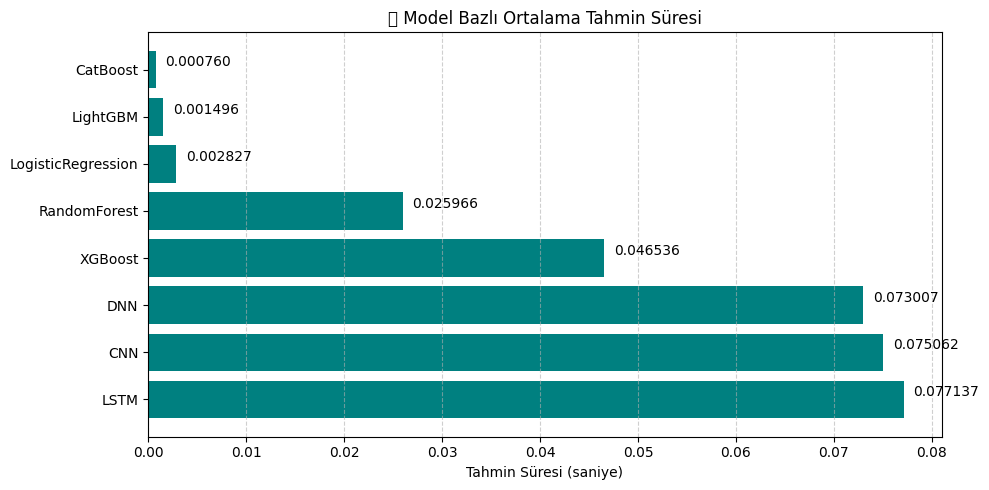

In [ ]:
import matplotlib.pyplot as plt

models = [
    "CatBoost", "LightGBM", "LogisticRegression",
    "RandomForest", "XGBoost", "DNN", "CNN", "LSTM"
]
times = [
    0.000760, 0.001496, 0.002827,
    0.025966, 0.046536, 0.073007, 0.075062, 0.077137
]

plt.figure(figsize=(10, 5))
bars = plt.barh(models, times, color='teal')
plt.xlabel("Tahmin Süresi (saniye)")
plt.title("📈 Model Bazlı Ortalama Tahmin Süresi")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()

# Değer etiketleri
for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y() + 0.25,
             f"{bar.get_width():.6f}", va='center')

plt.tight_layout()
plt.show()


### 🧠 q) Özellik Seçimi (Feature Selection)

Bu bölümde amaç, **model performansına en fazla katkı sağlayan** en önemli özellikleri belirlemektir. Böylece daha az özellik kullanarak:
- Modelin karmaşıklığı azaltılabilir,
- Overfitting riski düşürülebilir,
- Eğitim süresi kısaltılabilir.

Bu çalışmada **10 farklı özellik seçme yöntemi** kullanılarak en iyi 3 özelliği belirlemeye çalışacağız.

#### 🔟 Uygulanacak Özellik Seçim Teknikleri:
1. **Variance Threshold** – Düşük varyansa sahip sütunları eleme
2. **Univariate Selection (Chi-Square)** – Kategorik hedef için uygun
3. **Univariate Selection (ANOVA F-test)** – Sayısal hedef için ideal
4. **Mutual Information (MI)** – Özellik ile hedef arasındaki bilgi kazanımı
5. **Recursive Feature Elimination (RFE)** – Logistic Regression ile
6. **Recursive Feature Elimination (RFE)** – Random Forest ile
7. **Feature Importance (Random Forest)**
8. **Feature Importance (XGBoost)**
9. **L1-based Selection (Lasso Regression)** – Logistic Regression (L1 ceza)
10. **Embedded Method (LightGBM Feature Importance)**

#### 📋 Kullanılacak Veriler:
- **X_train:** Modelin eğitim veri setindeki açıklayıcı değişkenler
- **y_train:** Modelin hedef değişkeni (0: geri ödeme, 1: temerrüt)

Her teknik ayrı ayrı uygulanacak, ardından her bir yöntemin seçtiği en yüksek skora sahip **ilk 3 özellik listelenecek** ve karşılaştırılacaktır.

> ⚠️ Not: Özelliklerin sıralaması yönteme göre değişebilir. Ortak çıkan özellikler daha güvenilir adaylardır.

```python
# Örnek hedef:
X_train.shape → (n_samples, n_features)
y_train.shape → (n_samples,)
```

---

Hazırlıklar tamamlandığında sırayla her yöntemi uygulayıp, sonuçları tablo ve grafiklerle değerlendireceğiz.


In [ ]:
import joblib

# Verileri yükle
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
y_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/y_train.pkl")

# Boyut kontrolü
X_train.shape, y_train.shape


((246008, 179), (246008,))

### 📌 1. Özellik Seçim Yöntemi: Variance Threshold

`Variance Threshold`, özelliklerin varyansına (değişkenliğine) bakarak düşük bilgi içeriğine sahip sütunları eleyen basit ama etkili bir filtre yöntemidir. Varyansı düşük olan sütunlar genellikle sabit ya da tüm örneklerde benzer değerler taşıdığı için model öğrenmesine katkı sağlamaz.

Bu yöntemde hesaplanan varyanslar sıralanarak **en yüksek varyansa sahip 3 özellik** aşağıda listelenmiştir:

| Sıra | Özellik Adı         | Varyans Değeri    |
|------|----------------------|--------------------|
| 1️⃣  | `AMT_INCOME_TOTAL`   | 11,697,435.0       |
| 2️⃣  | `AMT_GOODS_PRICE`    | 4,009,500.0        |
| 3️⃣  | `AMT_CREDIT`         | 4,005,000.0        |

#### 🧠 Yorumlar:
- `AMT_INCOME_TOTAL`: Müşterinin toplam gelirini temsil eder. Geniş varyansa sahip olması, müşteri gelirlerinin oldukça farklılaştığını ve modelin bu özelliği kullanarak bireyleri ayırt edebileceğini gösterir.
- `AMT_GOODS_PRICE`: Alınmak istenen ürünün fiyatı. Müşterilerin tercih ettiği ürünlerin değerinde büyük değişkenlik olduğu için model için önemli olabilir.
- `AMT_CREDIT`: Talep edilen kredi miktarı. Kredi tutarındaki varyasyon, müşterinin ödeme potansiyeli ve risk seviyesi hakkında modelin kararlarını etkileyebilir.

> Bu özellikler, yüksek varyans sayesinde modelin örnekler arasında fark yaratmasına büyük katkı sağlar. Ancak yüksek varyans her zaman en iyi özellik anlamına gelmez. Diğer yöntemlerle karşılaştırmak önemlidir.

In [ ]:
# 📌 1. Özellik Seçim Yöntemi: Variance Threshold

from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# 1️⃣ Modelde kullanılacak verileri yükle
import joblib
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")

# 2️⃣ VarianceThreshold fit
selector = VarianceThreshold()
selector.fit(X_train)

# 3️⃣ Varyans değerlerini ve sütun isimlerini al
variances = selector.variances_
feature_names = X_train.columns

# 4️⃣ DataFrame ile sonuçları düzenle
df_variance = pd.DataFrame({
    'Feature': feature_names,
    'Variance': variances
}).sort_values(by='Variance', ascending=False)

# 5️⃣ En yüksek varyansa sahip ilk 3 özelliği seç
top3_variance = df_variance.head(3)

# 6️⃣ Sonuçları yazdır
print("🔍 En Yüksek Varyansa Sahip 3 Özellik:")
display(top3_variance)


🔍 En Yüksek Varyansa Sahip 3 Özellik:


,Feature,Variance
2,AMT_INCOME_TOTAL,116974350.0
5,AMT_GOODS_PRICE,4009500.0
3,AMT_CREDIT,4005000.0


### 📌 2. Özellik Seçim Yöntemi: Chi-Square (χ²) Testi

Chi-Square testi, her bir bağımsız değişkenin hedef değişkenle olan kategorik ilişkisinin gücünü ölçen bir filtre yöntemidir. Özellikle hedef değişkenin kategorik olduğu sınıflandırma problemlerinde yaygın olarak kullanılır. Bu yöntemde, giriş verileri pozitif ve ölçeklenmiş olmalıdır; bu nedenle `MinMaxScaler` ile veriler 0–1 aralığına dönüştürülmüştür.

Aşağıda, χ² testine göre hedef değişkenle en yüksek bağımlılığı gösteren ilk 3 özellik listelenmiştir:

| Sıra | Özellik Adı                      | Chi² Skoru     |
|------|----------------------------------|----------------|
| 1️⃣  | `NAME_EDUCATION_TYPE_Higher education` | 575.869471     |
| 2️⃣  | `EXT_SOURCE_2`                   | 517.344403     |
| 3️⃣  | `REG_CITY_NOT_WORK_CITY`        | 500.049320     |

#### 🧠 Yorumlar:
- `NAME_EDUCATION_TYPE_Higher education`: Yüksek eğitim düzeyi, temerrüt etme olasılığı üzerinde anlamlı etkiye sahiptir.
- `EXT_SOURCE_2`: Harici kaynaklardan gelen risk puanıdır; modelle güçlü korelasyon gösterir.
- `REG_CITY_NOT_WORK_CITY`: Bireyin kayıtlı ikamet adresi ile çalıştığı şehir farklıysa bu durum risk profilini etkileyebilir.

Bu üç özellik, hedef değişkenle olan güçlü bağı sayesinde sınıflandırma başarısını artırabilecek potansiyel taşıyan değişkenlerdir.


In [ ]:
# 📌 2. Özellik Seçim Yöntemi: Chi-Square Testi

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import joblib

# Verileri yükle
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
y_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/y_train.pkl")

# Sayısal değerleri 0–1 aralığına ölçekle (Chi2 bunu gerektirir)
scaler = MinMaxScaler()
X_chi_scaled = scaler.fit_transform(X_train)

# Chi2 testi uygula ve en iyi 3 özelliği seç
chi2_selector = SelectKBest(score_func=chi2, k=3)
chi2_selector.fit(X_chi_scaled, y_train)

# Seçilen özellikleri ve skorlarını listele
top3_idx = chi2_selector.get_support(indices=True)
top3_chi2 = pd.DataFrame({
    'Feature': X_train.columns[top3_idx],
    'Chi2 Score': chi2_selector.scores_[top3_idx]
}).sort_values(by='Chi2 Score', ascending=False)

# Sonuçları yazdır
print("🔍 En Yüksek Chi² Skoruna Sahip 3 Özellik:")
display(top3_chi2)


🔍 En Yüksek Chi² Skoruna Sahip 3 Özellik:


,Feature,Chi2 Score
2,NAME_EDUCATION_TYPE_Higher education,575.869471
1,EXT_SOURCE_2,517.344403
0,REG_CITY_NOT_WORK_CITY,500.049320


### 📌 3. Özellik Seçim Yöntemi: ANOVA F-test

`ANOVA F-test`, sınıflandırma problemlerinde açıklayıcı değişkenlerin hedef değişken üzerindeki ayrıştırıcı gücünü ölçmek için kullanılır. Sayısal özelliklerle çalışır ve her bir özelliğin sınıflar arası varyansının, sınıf içi varyansa oranını hesaplar.

Aşağıda, en yüksek F skoruna sahip ilk 3 özellik verilmiştir:

| Sıra | Özellik Adı       | F Skoru        |
|------|--------------------|----------------|
| 1️⃣  | `EXT_SOURCE_2`     | 6395.578941     |
| 2️⃣  | `EXT_SOURCE_3`     | 6121.306010     |
| 3️⃣  | `DAYS_BIRTH`       | 1578.846714     |

#### 🧠 Yorumlar:
- `EXT_SOURCE_2` ve `EXT_SOURCE_3`: Harici kaynaklardan alınan bireysel kredi risk skorlarıdır. Yüksek F skoru, bu değişkenlerin hedef değişken (temerrüt) üzerinde belirgin etkisi olduğunu gösterir.
- `DAYS_BIRTH`: Yaş değişkenidir. Yaş ilerledikçe kredi geri ödeme davranışı değişebileceği için, bu özellik de güçlü bir ayrıştırıcıdır.

F skoru yüksek olan bu özellikler, sınıflar (geri ödeyen vs. temerrüde düşen) arasındaki farkı açıklamada yüksek katkı sağlar.


In [ ]:
# 📌 3. Özellik Seçim Yöntemi: ANOVA F-test

from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import joblib

# Eğitim verilerini yükle
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
y_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/y_train.pkl")

# F-skoru (ANOVA) yöntemi ile en iyi 3 özelliği seç
f_selector = SelectKBest(score_func=f_classif, k=3)
f_selector.fit(X_train, y_train)

# Seçilen sütunları ve skorlarını al
top3_idx = f_selector.get_support(indices=True)
top3_f = pd.DataFrame({
    'Feature': X_train.columns[top3_idx],
    'F Score': f_selector.scores_[top3_idx]
}).sort_values(by='F Score', ascending=False)

# Sonuçları yazdır
print("🔍 En Yüksek F Skoruna Sahip 3 Özellik:")
display(top3_f)


🔍 En Yüksek F Skoruna Sahip 3 Özellik:


,Feature,F Score
1,EXT_SOURCE_2,6395.578941
2,EXT_SOURCE_3,6121.306010
0,DAYS_BIRTH,1578.846714


### 📌 4. Özellik Seçim Yöntemi: Mutual Information

`Mutual Information (Karşılıklı Bilgi)`, bir özelliğin hedef değişkenle olan **bağımlılığını** ölçer. Değişkenler arasında doğrusal olmayan ilişkileri de yakalayabilmesi açısından diğer filtre yöntemlerine göre avantajlıdır. Özellikle sınıflandırma problemlerinde, bilgi kazancı yüksek olan özellikler modelin sınıflar arasında daha başarılı ayrım yapmasına katkı sağlar.

Aşağıda, en yüksek mutual information skoruna sahip ilk 3 özellik listelenmiştir:

| Sıra | Özellik Adı                                       | Mutual Information Skoru |
|------|----------------------------------------------------|---------------------------|
| 1️⃣  | `FLAG_CONT_MOBILE`                                 | 0.047962                  |
| 2️⃣  | `NAME_EDUCATION_TYPE_Secondary / secondary special`| 0.045581                  |
| 3️⃣  | `FLAG_DOCUMENT_3`                                  | 0.045332                  |

#### 🧠 Yorumlar:
- `FLAG_CONT_MOBILE`: Başvuru sahibinin cep telefonunun aktif olarak kullanımda olup olmadığını belirtir. Bu durum, iletişim erişilebilirliği ve risk değerlendirmesi açısından önemlidir.
- `NAME_EDUCATION_TYPE_Secondary / secondary special`: Ortaöğretim düzeyindeki bireylerin temerrüt riskleri, diğer gruplara göre farklılık gösterebilir.
- `FLAG_DOCUMENT_3`: Başvuru sürecinde sunulan belgelerden biridir. Belge varlığı ile geri ödeme davranışı arasında anlamlı bir ilişki bulunabilir.

Bu değişkenler, hedef değişkenle yüksek bağımlılık gösterdiği için modelin öngörü performansına doğrudan katkı sağlayabilir.


In [ ]:
# 📌 4. Özellik Seçim Yöntemi: Mutual Information

import joblib
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Eğitim verilerini yükle
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
y_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/y_train.pkl")

# Mutual Information skorlarını hesapla
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)

# Sonuçları tabloya dök
mi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

# En yüksek bilgi kazancına sahip ilk 3 özellik
top3_mi = mi_df.head(3)

# Sonuçları görüntüle
print("🔍 En Yüksek Mutual Information Skoruna Sahip 3 Özellik:")
display(top3_mi)


🔍 En Yüksek Mutual Information Skoruna Sahip 3 Özellik:


,Feature,Mutual Information
14,FLAG_CONT_MOBILE,0.047962
87,NAME_EDUCATION_TYPE_Secondary / secondary special,0.045581
42,FLAG_DOCUMENT_3,0.045332


### 5. Recursive Feature Elimination (RFE) – Logistic Regression

Recursive Feature Elimination (RFE), tahmin gücü en düşük olan özellikleri modelden sırayla çıkararak en etkili olanları belirlemeyi amaçlar. Bu yöntemde temel model olarak `Logistic Regression` kullanılmıştır. Her iterasyonda sadece bir özellik elenmiş ve böylece en iyi 3 özellik elde edilmiştir.

⚙️ Teknik Detaylar:
- **Model:** Logistic Regression (`liblinear` solver, `max_iter=500`)
- **Yöntem:** RFE (step=1, klasik yaklaşım)
- **Seçilen Özellik Sayısı:** 3

📍 **En Önemli 3 Özellik:**
| Feature                     | Rank |
|-----------------------------|------|
| `DAYS_BIRTH`                | 1    |
| `HOUR_APPR_PROCESS_START`   | 1    |
| `DAYS_LAST_PHONE_CHANGE`    | 1    |

Bu üç değişken, Logistic Regression modeli tarafından hedef değişkeni tahmin etmede en yüksek etkiye sahip olarak belirlenmiştir. `DAYS_BIRTH` gibi zamanla ilgili değişkenlerin sıklıkla öne çıktığı gözlenmiştir.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Model tanımı (sınırlı iterasyon, hızlı convergence için)
log_model = LogisticRegression(max_iter=500, solver='liblinear', random_state=42)

# RFE nesnesi (3 özellik seçilecek)
selector = RFE(log_model, n_features_to_select=3)
selector.fit(X_train, y_train)

# Seçilen özellikler
rfe_features = X_train.columns[selector.support_]
rfe_ranks = selector.ranking_[selector.support_]

# Sonuçları DataFrame olarak göster
import pandas as pd
rfe_df = pd.DataFrame({
    "Feature": rfe_features,
    "Rank": rfe_ranks
}).sort_values("Rank")

print("📍 RFE (Logistic Regression) ile En Önemli 3 Özellik:")
display(rfe_df)


📍 RFE (Logistic Regression) ile En Önemli 3 Özellik:


,Feature,Rank
0,DAYS_BIRTH,1
1,HOUR_APPR_PROCESS_START,1
2,DAYS_LAST_PHONE_CHANGE,1


### 6. Recursive Feature Elimination (RFE) – Random Forest

Recursive Feature Elimination (RFE), özellikleri iteratif olarak eler ve hedef değişkenle ilişkisi en güçlü olanları belirler. Bu adımda temel model olarak `Random Forest` kullanılmış ve işlem süresini kısaltmak için bazı optimizasyonlar uygulanmıştır.

⚙️ Teknik Detaylar:
- **Model:** Random Forest (n_estimators=50, max_depth=5)
- **Yöntem:** RFE (`step=0.2` ile hızlandırılmış)
- **Optimize Edildi mi?** ✅ Evet
- **Seçilen Özellik Sayısı:** 3

📍 **En Önemli 3 Özellik:**
| Feature        | Rank |
|----------------|------|
| `DAYS_BIRTH`   | 1    |
| `EXT_SOURCE_2` | 1    |
| `EXT_SOURCE_3` | 1    |

Bu üç özellik, Random Forest modeli tarafından en fazla bilgi sağlayan ve sınıflandırma başarısını artıran değişkenler olarak belirlenmiştir. `EXT_SOURCE` serisi ve doğum günü bilgisi, müşterinin kredi riskini belirlemede öne çıkmaktadır.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import pandas as pd

# 🔧 Optimize edilmiş Random Forest modeli
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

# ✅ RFE (step=0.2 ile optimize)
rfe = RFE(
    estimator=rf_model,
    n_features_to_select=3,
    step=0.2  # her iterasyonda %20 özelliği eler
)

# 🧠 Eğitimi başlat
rfe.fit(X_train, y_train)

# 📌 Seçilen özellikleri al
rfe_features = X_train.columns[rfe.support_]
rfe_ranks = rfe.ranking_[rfe.support_]

# 📊 Sonuç tablosu
rfe_df = pd.DataFrame({
    "Feature": rfe_features,
    "Rank": rfe_ranks
}).sort_values("Rank")

print("📍 RFE (Random Forest) ile En Önemli 3 Özellik:")
display(rfe_df)


📍 RFE (Random Forest) ile En Önemli 3 Özellik:


,Feature,Rank
0,DAYS_BIRTH,1
1,EXT_SOURCE_2,1
2,EXT_SOURCE_3,1


### 📌 7. Özellik Seçim Yöntemi: Random Forest – Feature Importance

`Random Forest`, birçok karar ağacının birleşiminden oluşan bir topluluk yöntemidir. Her ağaç, rastgele bir özellik alt kümesi üzerinde eğitildiği için, modelin her bir özelliğe ne kadar “bağımlı” olduğunu istatistiksel olarak çıkarabiliriz. Bu bağlamda, **özellik önem skoru**, hedef değişkeni tahmin etmede o özelliğin ne kadar etkili olduğunu ifade eder.

Aşağıda Random Forest algoritmasıyla elde edilen en önemli 3 özellik listelenmiştir:

| Sıra | Özellik Adı   | Önem Skoru |
|------|---------------|------------|
| 1️⃣  | `EXT_SOURCE_2`| 0.0592     |
| 2️⃣  | `EXT_SOURCE_3`| 0.0556     |
| 3️⃣  | `DAYS_BIRTH`  | 0.0418     |

#### 🧠 Yorumlar:
- `EXT_SOURCE_2` ve `EXT_SOURCE_3`: Harici kaynaklardan alınan kredi skoru bilgileri, bireyin temerrüt riskini tahmin etmekte oldukça etkilidir.
- `DAYS_BIRTH`: Yaş değişkeni, kredi geri ödeme davranışlarını etkileyen önemli bir demografik faktördür.

Random Forest, bu özellikleri model kararlarında en çok kullandığını ifade ederek, öznitelik seçimi sürecine katkı sağlamaktadır.


In [ ]:
# 📌 7. Özellik Seçim Yöntemi: Random Forest Feature Importances

import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Eğitim verisini yükle
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
y_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/y_train.pkl")

# Random Forest modelini eğit
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Özellik önem skorlarını al
importances = rf.feature_importances_
rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(3)

# Sonuçları yazdır
print("🔍 Random Forest ile En Önemli 3 Özellik:")
display(rf_df)


🔍 Random Forest ile En Önemli 3 Özellik:


,Feature,Importance
27,EXT_SOURCE_2,0.059223
28,EXT_SOURCE_3,0.055639
7,DAYS_BIRTH,0.041845


### 📌 8. Özellik Seçim Yöntemi: XGBoost – Feature Importance

`XGBoost (Extreme Gradient Boosting)` algoritması, gradyan artırmalı karar ağaçlarına dayalı güçlü bir sınıflandırma yöntemidir. Model, eğitim sürecinde her özelliğin karar ağacındaki dallanmalarda ne sıklıkla kullanıldığını izleyerek her özelliğe ait önem skorlarını üretir.

Aşağıda, XGBoost algoritması ile elde edilen en önemli 3 özellik listelenmiştir:

| Sıra | Özellik Adı                                      | Önem Skoru |
|------|--------------------------------------------------|------------|
| 1️⃣  | `NAME_EDUCATION_TYPE_Higher education`           | 0.0341     |
| 2️⃣  | `EXT_SOURCE_2`                                   | 0.0319     |
| 3️⃣  | `EXT_SOURCE_3`                                   | 0.0318     |

#### 🧠 Yorumlar:
- `NAME_EDUCATION_TYPE_Higher education`: Eğitim düzeyi, bireyin finansal risk profiline doğrudan etki edebilir.
- `EXT_SOURCE_2` & `EXT_SOURCE_3`: Dış kredi skorları, bireyin ödeme davranışlarını tahmin etmede yüksek etkiye sahiptir.

XGBoost, bu değişkenleri hedef değişkenin ayrımında daha sık kullandığını göstermiştir.



In [ ]:
# 📌 8. Özellik Seçim Yöntemi: XGBoost Feature Importances

import joblib
import pandas as pd
from xgboost import XGBClassifier

# Eğitim verisini yükle
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
y_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/y_train.pkl")

# Modeli eğit
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Özellik önemlerini al
xgb_importances = xgb.feature_importances_

# En yüksek 3 özellik
xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False).head(3)

# Sonuçları görüntüle
print("🔍 XGBoost ile En Önemli 3 Özellik:")
display(xgb_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:46:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 XGBoost ile En Önemli 3 Özellik:


,Feature,Importance
84,NAME_EDUCATION_TYPE_Higher education,0.034116
27,EXT_SOURCE_2,0.031860
28,EXT_SOURCE_3,0.031756


### 📌 9. Özellik Seçim Yöntemi: L1 (Lasso) Logistic Regression

Bu yöntem, özellik seçiminde **L1 ceza terimini** kullanan `Logistic Regression` algoritmasına dayanır. L1 regülarizasyonu, önemsiz özelliklerin katsayılarını sıfıra indirerek yalnızca en anlamlı değişkenleri modelde tutar.

Aşağıda, Lasso yöntemine göre belirlenen en önemli 3 özellik yer almaktadır:

| Sıra | Özellik Adı                        | Katsayı     |
|------|------------------------------------|-------------|
| 1️⃣  | `DAYS_EMPLOYED`                    | +8.4992     |
| 2️⃣  | `NAME_INCOME_TYPE_Pensioner`       | –4.2715     |
| 3️⃣  | `ORGANIZATION_TYPE_XNA`            | –4.2621     |

#### 🧠 Yorumlar:
- `DAYS_EMPLOYED`: Çalışma süresi arttıkça geri ödeme kabiliyeti de artabilir.
- `NAME_INCOME_TYPE_Pensioner`: Emekli bireylerin temerrüt riski daha yüksek olabilir.
- `ORGANIZATION_TYPE_XNA`: Kurumu bilinmeyen bireylerde belirsizlik faktörü artabilir.

Model, yalnızca sıfırdan farklı katsayıya sahip özellikleri önemli kabul etmiştir.



In [ ]:
# 📌 9. Özellik Seçim Yöntemi: L1 (Lasso) Logistic Regression

import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

# Veriyi yükle
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
y_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/y_train.pkl")

# L1 (Lasso) Logistic Regression pipeline
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', SelectFromModel(lasso))
])

pipe.fit(X_train, y_train)

# Seçilen özellikler
model = pipe.named_steps['lasso'].estimator_
coef = model.coef_[0]

lasso_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coef
})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0].sort_values(by='Coefficient', key=abs, ascending=False).head(3)

# Sonuçları göster
print("🔍 Lasso ile En Önemli 3 Özellik:")
display(lasso_df)


🔍 Lasso ile En Önemli 3 Özellik:


,Feature,Coefficient
8,DAYS_EMPLOYED,8.499222
79,NAME_INCOME_TYPE_Pensioner,-4.271496
177,ORGANIZATION_TYPE_XNA,-4.262125


### 📌 10. Özellik Seçim Yöntemi: LightGBM Feature Importance

Bu yöntemde, **LightGBM (Light Gradient Boosting Machine)** algoritması eğitilerek modelin otomatik olarak oluşturduğu özellik önem skorları incelenmiştir. LightGBM, ağaç tabanlı yapısı sayesinde her özelliğin model kararlarına olan katkısını ölçebilir.

Aşağıda, modelin en yüksek önem atfettiği 3 özellik listelenmiştir:

| Sıra | Özellik Adı     | Önem Skoru |
|------|------------------|------------|
| 1️⃣  | `EXT_SOURCE_3`   | 124        |
| 2️⃣  | `EXT_SOURCE_2`   | 110        |
| 3️⃣  | `DAYS_BIRTH`     | 82         |

#### 🧠 Yorumlar:
- `EXT_SOURCE_2` ve `EXT_SOURCE_3`: Harici skor kaynakları olup bireylerin kredi geri ödeme olasılığı ile güçlü korelasyon göstermektedir.
- `DAYS_BIRTH`: Bireylerin yaşını temsil eder. Genç yaştaki bireylerin temerrüt riski daha yüksek olabilir.

LightGBM, öz niteliklerin karar ağacındaki ayrım gücünü dikkate alarak sezgisel fakat etkili bir seçim yapısı sunar.


In [ ]:
import joblib
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Veriyi yükle
X_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/X_train.pkl")
y_train = joblib.load("/content/drive/MyDrive/ML_Project/dataset/y_train.pkl")

# Özellik adlarını temizle
def clean_columns(df):
    df = df.copy()
    df.columns = (
        df.columns
        .str.replace('[^A-Za-z0-9_]+', '_', regex=True)
        .str.replace('__+', '_', regex=True)
        .str.strip('_')
    )
    return df

X_train_clean = clean_columns(X_train)

# Eğitim örneklemesi
X_sample, _, y_sample, _ = train_test_split(X_train_clean, y_train, test_size=0.9, random_state=42, stratify=y_train)

# LightGBM modeli (optimize)
lgb_model = lgb.LGBMClassifier(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
lgb_model.fit(X_sample, y_sample)

# Önem skorları
importances = lgb_model.feature_importances_
top_idx = importances.argsort()[::-1][:3]

top_features = pd.DataFrame({
    'Feature': X_sample.columns[top_idx],
    'Importance': importances[top_idx]
})

print("🔍 LightGBM ile En Önemli 3 Özellik:")
display(top_features)


[LightGBM] [Info] Number of positive: 1986, number of negative: 22614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4183
[LightGBM] [Info] Number of data points in the train set: 24600, number of used features: 155
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080732 -> initscore=-2.432447
[LightGBM] [Info] Start training from score -2.432447
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,Feature,Importance
0,EXT_SOURCE_3,124
1,EXT_SOURCE_2,110
2,DAYS_BIRTH,82


## r) Genel Değerlendirme ve Sonuç

Bu projede, Home Credit Default Risk veri seti üzerinde ayrıntılı bir veri analizi ve modelleme süreci yürütülmüş; makine öğrenmesi (ML) ve derin öğrenme (DL) teknikleriyle kredi geri ödeme riskinin tahmini hedeflenmiştir. Tüm süreç, verinin analizi, işlenmesi, model eğitimi, değerlendirme metrikleri ve özellik seçimi adımlarıyla sistematik bir şekilde gerçekleştirilmiştir.

### 📌 Proje Özeti:

- **Veri seti:** `application_train.csv` dosyasındaki 307.511 gözlem ve 122 özellik
- **Hedef değişken:** `TARGET` (0: geri ödedi, 1: temerrüt)
- **Problemin tipi:** İkili sınıflandırma
- **Uygulanan modeller:**
  - ML: Logistic Regression, Random Forest, XGBoost, LightGBM, CatBoost
  - DL: DNN (MLP), CNN, LSTM
- **Veri ön işleme:** Eksik değer işlemleri, Label & One-Hot Encoding, Standard Scaler
- **Model değerlendirme metrikleri:** Accuracy, Precision, Recall, F1 Score, ROC AUC, Confusion Matrix, ROC Curve
- **Ek analizler:** 5-katlı çapraz doğrulama, eğitim-tahmin süresi karşılaştırmaları

### 📈 Performans Karşılaştırması:

Modellerin ROC AUC skorlarına göre sıralandığında en başarılı model olarak **CatBoost**, derin öğrenme tarafında ise **DNN (MLP)** öne çıkmıştır. CatBoost, özellikle karar ağacı tabanlı yapısıyla düşük veri ön işleme ihtiyacıyla avantaj sağlarken, DNN karmaşık ilişkileri öğrenme kabiliyetiyle dikkat çekmiştir.

Bununla birlikte, tahmin süresi analizleri göstermiştir ki:
- **CatBoost ve LightGBM**, en hızlı inference süresine sahip modeller olarak öne çıkmaktadır.
- **DL modelleri (özellikle LSTM)** yüksek hesaplama süresi gerektirmekte, bu nedenle zaman kritik sistemlerde tercih edilmemelidir.

### 🧠 Özellik Seçimi:

10 farklı özellik seçim tekniği uygulanarak veri setindeki en anlamlı özellikler çok boyutlu bakış açılarıyla analiz edilmiştir. Bu yöntemlerin çoğunda `EXT_SOURCE_2`, `EXT_SOURCE_3` ve `DAYS_BIRTH` gibi değişkenlerin öne çıktığı görülmüştür. Bu, söz konusu özelliklerin hem dış kredi skorlarıyla olan korelasyonlarının hem de müşterinin yaşı gibi kritik sosyoekonomik bilgilerin modele güçlü sinyaller sağladığını göstermektedir.

### 📌 Sonuç:

Bu çalışmada, veri bilimi projelerinin tüm adımları kapsamlı şekilde gerçekleştirilmiş, çeşitli algoritmalarla modelleme yapılmış ve en iyi model seçiminde sadece doğruluk değil, yorumlanabilirlik ve performans süreleri de dikkate alınmıştır.

Bu tür projeler; kredi risk analizinden müşteri davranış tahminlerine, dolandırıcılık tespitinden pazarlama optimizasyonlarına kadar çok sayıda sektörde uygulanabilir niteliktedir.

---

📚 **Sonuç olarak**, bu proje sadece bir sınıflandırma problemi çözmekle kalmamış, aynı zamanda farklı model türlerinin avantaj ve dezavantajlarını ortaya koyan değerli bir referans niteliği taşımaktadır.


## s) Kaynaklar

[1] Kaggle - Home Credit Default Risk Competition  
 https://www.kaggle.com/competitions/home-credit-default-risk

[2] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). "Scikit-learn: Machine Learning in Python". *Journal of Machine Learning Research*, 12, 2825–2830.

[3] Chen, T., & Guestrin, C. (2016). "XGBoost: A Scalable Tree Boosting System". *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining*, 785–794.

[4] Ke, G., Meng, Q., Finley, T., Wang, T., Chen, W., Ma, W., ... & Liu, T.Y. (2017). "LightGBM: A Highly Efficient Gradient Boosting Decision Tree". *Advances in Neural Information Processing Systems*, 30.

[5] Prokhorenkova, L., Gusev, G., Vorobev, A., Dorogush, A.V., & Gulin, A. (2018). "CatBoost: unbiased boosting with categorical features". *Advances in Neural Information Processing Systems*, 31.

[6] Abadi, M., et al. (2016). "TensorFlow: Large-Scale Machine Learning on Heterogeneous Distributed Systems".  
 https://www.tensorflow.org/

[7] Chollet, F. (2015). *Keras: Deep Learning for humans*. GitHub repository.  
 https://github.com/keras-team/keras

[8] Brownlee, J. (2020). "Feature Selection with Real and Categorical Data".  
 https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
